# **a) Introduction**

Ce notebook consiste en la création de notre jeu de données pour le Machine Learning.

Il y intègre aussi les éléments de datavisualisation.

Le code et la démarche sont décrits, cependant, se référer au rapport pour des précisions ou des compléments.

# **b) Création du jeu de données des résultats des matchs**



La première étape consiste à importer les données des résultats des matchs que nous avons récupérées sur le site https://www.football-data.co.uk/data.php.

*   Import des bibliothèques et définition des paramètres d'affichage.

In [ ]:
import pandas as pd
import numpy as np
import re
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

*   Concaténation des différents fichiers .csv contenant les résultats des matchs dans un DataFrame **matches_results**,
*   Création d'une colonne **Season**.
*   Renommage de colonnes.



In [ ]:
matches_results = pd.DataFrame()
folders = []
address = "drive/MyDrive/Formations/DataScientest/Projet/Projet paris sportifs/Données d'entrée/Résultats/"

for folder in listdir(address):

  for file in listdir(address + "/" + folder):
    print(folder + "/" + file)
    df = pd.read_csv(address + folder + "/" + file , encoding = 'unicode_escape')
    
    if "Season" in list(df.columns):
      df["Season"] = file.replace(".csv" , "")
    else:
      df.insert(0 , "Season" , file.replace(".csv" , ""))
    
    if "HFKC" in list(df.columns):
      df = df.rename(columns = {"HFKC" : "HF" , "AFKC" : "AF"})
    
    df["Div"] = folder
    matches_results = pd.concat([matches_results , df])

German 2. Bundesliga/2018-2019.csv
German 2. Bundesliga/2019-2020.csv
German 2. Bundesliga/2017-2018.csv
German 2. Bundesliga/2020-2021.csv
English League Championship/2019-2020.csv
English League Championship/2016-2017.csv
English League Championship/2020-2021.csv
English League Championship/2017-2018.csv
English League Championship/2015-2016.csv
English League Championship/2018-2019.csv
English League Championship/2014-2015.csv
German 1. Bundesliga/2015-2016.csv
German 1. Bundesliga/2017-2018.csv
German 1. Bundesliga/2020-2021.csv
German 1. Bundesliga/2019-2020.csv
German 1. Bundesliga/2016-2017.csv
German 1. Bundesliga/2014-2015.csv
German 1. Bundesliga/2018-2019.csv
French Ligue 2/2019-2020.csv
French Ligue 2/2020-2021.csv
French Ligue 2/2018-2019.csv
French Ligue 2/2017-2018.csv
English League Two/2017-2018.csv
English League Two/2016-2017.csv
English League Two/2015-2016.csv
English League Two/2020-2021.csv
English League Two/2014-2015.csv
English League Two/2019-2020.csv
English

*   Réinitialisation de l'index.

In [ ]:
matches_results = matches_results.reset_index(drop = True)

*   Visualisation du DataFrame **matches_results**.

In [ ]:
matches_results.head()

,Season,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,LBH,LBD,LBA,Referee,SJH,SJD,SJA
0,2018-2019,German 2. Bundesliga,03/08/2018,Hamburg,Holstein Kiel,0.0,3.0,A,0.0,0.0,D,14.0,16.0,3.0,8.0,11.0,11.0,4.0,10.0,1.0,3.0,0.0,0.0,1.70,3.60,5.00,1.67,3.70,5.25,1.75,3.5,4.50,1.78,3.59,5.20,1.75,3.7,4.33,1.75,3.75,4.60,40.0,1.80,1.73,3.9,3.59,5.30,4.75,37.0,1.95,1.87,2.06,1.91,17.0,-1.0,2.44,2.35,1.67,1.60,1.85,3.62,4.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-2019,German 2. Bundesliga,04/08/2018,Bochum,FC Koln,0.0,2.0,A,0.0,1.0,A,14.0,15.0,2.0,5.0,17.0,19.0,6.0,1.0,3.0,2.0,0.0,1.0,2.80,3.10,2.60,2.85,3.20,2.50,2.65,3.3,2.50,2.91,3.18,2.62,2.80,3.2,2.50,2.80,3.25,2.60,37.0,3.00,2.78,3.3,3.16,2.65,2.53,33.0,2.07,1.99,1.92,1.80,17.0,0.0,2.06,2.00,1.89,1.83,3.13,3.38,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-2019,German 2. Bundesliga,04/08/2018,Greuther Furth,Sandhausen,3.0,1.0,H,0.0,0.0,D,16.0,10.0,5.0,5.0,19.0,11.0,6.0,8.0,1.0,1.0,0.0,0.0,2.25,3.20,3.30,2.30,3.10,3.30,2.30,3.3,2.90,2.40,3.01,3.43,2.40,3.0,3.10,2.38,3.20,3.13,39.0,2.45,2.32,3.3,3.04,3.49,3.23,32.0,2.38,2.28,1.66,1.59,17.0,0.0,1.69,1.65,2.34,2.25,3.04,3.07,2.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-2019,German 2. Bundesliga,04/08/2018,Regensburg,Ingolstadt,2.0,1.0,H,1.0,1.0,D,13.0,13.0,9.0,3.0,23.0,20.0,5.0,9.0,1.0,3.0,0.0,0.0,3.20,3.20,2.30,2.95,3.30,2.40,2.75,3.3,2.40,3.20,3.27,2.37,2.90,3.3,2.38,3.00,3.40,2.38,39.0,3.21,3.04,3.4,3.25,2.42,2.30,36.0,1.99,1.90,1.95,1.87,18.0,0.0,2.35,2.22,1.73,1.66,2.96,3.47,2.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-2019,German 2. Bundesliga,05/08/2018,Darmstadt,Paderborn,1.0,0.0,H,0.0,0.0,D,7.0,7.0,2.0,1.0,14.0,21.0,8.0,3.0,3.0,4.0,0.0,0.0,2.45,3.25,2.87,2.40,3.25,2.95,2.40,3.2,2.85,2.65,3.11,2.93,2.50,3.2,2.80,2.55,3.30,2.80,39.0,2.65,2.50,3.3,3.15,3.05,2.80,36.0,2.18,2.00,1.85,1.78,18.0,0.0,1.87,1.82,2.05,2.00,2.82,3.26,2.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*   Taille du DataFrame **matches_results**.

In [ ]:
matches_results.shape

(35969, 131)

*   Renommage de noms de colonnes.

In [ ]:
matches_results = matches_results.rename(columns = {"Div" : "Division" , "HomeTeam" : "Home team" , "AwayTeam" : "Away team"})


*   Déplacement des colonnes **LBH**, **LBD**, **LBA**, **SJH**, **SJD** et **SJA** pour avoir toutes les cotes les unes à la suite des autres.

In [ ]:
matches_results.insert(41 , "LBH" , matches_results.pop("LBH"))
matches_results.insert(42 , "LBD" , matches_results.pop("LBD"))
matches_results.insert(43 , "LBA" , matches_results.pop("LBA"))
matches_results.insert(44 , "SJH" , matches_results.pop("SJH"))
matches_results.insert(45 , "SJD" , matches_results.pop("SJD"))
matches_results.insert(46 , "SJA" , matches_results.pop("SJA"))

Toutes les colonnes contenant des cotes au-delà de la colonne **SJA** sont des cotes complexes que nous n'utiliserons pas.


*   Suppression des colonnes donnant les cotes des différents sites de paris sportifs au delà de la colonne **SJA**.

Les colonnes **Time** et **Referee** sont des colonnes descriptives qui ne nous sont pas utiles.

*   Suppression des colonnes **Time** et **Referee**.

Les colonnes **HTHG**, **HTAG**, et **HTR** donnent le score et le résultat du match à la mi-temps, ce qui n'est pas pertinent pour nous.

*   Suppression des colonnes **HTHG**, **HTAG**, et **HTR**.

In [ ]:
matches_results = matches_results.loc[: , : "SJA"]
matches_results = matches_results.drop(columns = ["HTHG" , "HTAG" , "HTR"])

*   Visualisation du nombre de valeurs manquantes.

In [ ]:
matches_results.isna().sum()

Season           0
Division         0
Date             7
Home team        7
Away team        7
FTHG             7
FTAG             7
FTR              7
HS              32
AS              32
HST             32
AST             32
HF              37
AF              37
HC              32
AC              32
HY              33
AY              32
HR              32
AR              33
B365H           74
B365D           74
B365A           74
BWH            112
BWD            112
BWA            112
IWH            112
IWD            112
IWA            116
PSH            220
PSD            220
PSA            220
WHH            179
WHD            179
WHA            179
VCH             73
VCD             73
VCA             73
LBH          18430
LBD          18430
LBA          18426
SJH          35502
SJD          35502
SJA          35502
dtype: int64

Les colonnes des cotes possèdent de nombreuses valeurs manquantes. À ce stade, ce que nous voulons est que pour chaque match, il existe au moins un site pour lequel il existe des cotes.

*   Suppression des matchs n'ayant pas de cotes.

In [ ]:
matches_results = matches_results.drop(matches_results[matches_results.loc[: , "B365H" :].isna().all(axis = 1)].index)

*   Visualisation du nombre de valeurs manquantes.

In [ ]:
matches_results.isna().sum()

Season           0
Division         0
Date             0
Home team        0
Away team        0
FTHG             0
FTAG             0
FTR              0
HS               4
AS               4
HST              4
AST              4
HF               9
AF               9
HC               4
AC               4
HY               5
AY               4
HR               4
AR               5
B365H           34
B365D           34
B365A           34
BWH             72
BWD             72
BWA             72
IWH             72
IWD             72
IWA             76
PSH            180
PSD            180
PSA            180
WHH            139
WHD            139
WHA            139
VCH             33
VCD             33
VCA             33
LBH          18390
LBD          18390
LBA          18386
SJH          35462
SJD          35462
SJA          35462
dtype: int64

Il y a aussi quelques matchs qui possèdent des statistiques manquantes (hors cotes).

*   Suppression des matchs ayant des statistiques manquantes.

In [ ]:
matches_results = matches_results.drop(matches_results[matches_results.loc[: , "FTHG" : "AR"].isna().any(axis = 1)].index)

*   Visualisation du nombre de valeurs manquantes.

In [ ]:
matches_results.isna().sum()

Season           0
Division         0
Date             0
Home team        0
Away team        0
FTHG             0
FTAG             0
FTR              0
HS               0
AS               0
HST              0
AST              0
HF               0
AF               0
HC               0
AC               0
HY               0
AY               0
HR               0
AR               0
B365H           34
B365D           34
B365A           34
BWH             72
BWD             72
BWA             72
IWH             72
IWD             72
IWA             76
PSH            180
PSD            180
PSA            180
WHH            139
WHD            139
WHA            139
VCH             33
VCD             33
VCA             33
LBH          18383
LBD          18383
LBA          18379
SJH          35451
SJD          35451
SJA          35451
dtype: int64

Désormais, seules les colonnes concernant les cotes contiennent des valeurs manquantes. Pour les besoins du Machine Learning, nous préfèrerons utiliser la cote maximale.

*   Création des variables **Max H**, **Max D** et **Max A** donnant les valeurs maximales des cotes pour chaque match.

In [ ]:
cote_cols = list(matches_results.loc[: , "B365H" :].columns)

cote_cols_H = []
cote_cols_D = []
cote_cols_A = []

rH = re.compile(r"\w+H$")
rD = re.compile(r"\w+D$")
rA = re.compile(r"\w+A$")

for col in cote_cols:
  
  if rH.findall(col) != []:
    cote_cols_H.append(rH.findall(col)[0])
    
  elif rD.findall(col) != []:
    cote_cols_D.append(rD.findall(col)[0])
  
  elif rA.findall(col) != []:
    cote_cols_A.append(rA.findall(col)[0])
  
  else:
    print("Error")

matches_results["Max H"] = matches_results[cote_cols_H].max(axis = 1)
matches_results["Max D"] = matches_results[cote_cols_D].max(axis = 1)
matches_results["Max A"] = matches_results[cote_cols_A].max(axis = 1)

Nous pouvons désormais supprimer les colonnes concernant les cotes (hors **Max H**, **Max D**, et **Max A**).

In [ ]:
matches_results = matches_results.loc[: , : "AR"].join(matches_results[["Max H" , "Max D" , "Max A"]])

*   Visualisation du nombre de valeurs manquantes.

In [ ]:
matches_results.isna().sum()

Season       0
Division     0
Date         0
Home team    0
Away team    0
FTHG         0
FTAG         0
FTR          0
HS           0
AS           0
HST          0
AST          0
HF           0
AF           0
HC           0
AC           0
HY           0
AY           0
HR           0
AR           0
Max H        0
Max D        0
Max A        0
dtype: int64

Nous n'avons plus de valeurs manquantes.

*   Visualisation du type de données de la colonne **Date**.

In [ ]:
matches_results["Date"].dtype

dtype('O')

La colonne **Date** est du type *Object*, nous devons la convertir en format *datetime*.

*   Conversion de la colonne **Date** en format *datetime*.

In [ ]:
matches_results["Date"] = pd.to_datetime(matches_results["Date"] , dayfirst = True)

*   Renommage de noms de clubs pour la correspondance avec les données du jeu FIFA (nécessaire pour plus tard).

In [ ]:
matches_results = matches_results.replace({
                                           "Dundee" : "Dundee FC" ,
                                           "Spal" : "SPAL" ,
                                           "St Truiden" : "Sint-Truidense VV" ,
                                           "Waregem" : "SV Zulte-Waregem" ,
                                           "St Etienne" : "AS Saint-Étienne" ,
                                           "Sp Lisbon" : "Sporting CP" ,
                                           "M'gladbach" : "Borussia Mönchengladbach" ,
                                           })

*   Réinitialisation de l'index.

In [ ]:
matches_results = matches_results.reset_index(drop = True)

*   Visualisation des infos du DataFrame **matches_results**.

In [ ]:
matches_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35918 entries, 0 to 35917
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Season     35918 non-null  object        
 1   Division   35918 non-null  object        
 2   Date       35918 non-null  datetime64[ns]
 3   Home team  35918 non-null  object        
 4   Away team  35918 non-null  object        
 5   FTHG       35918 non-null  float64       
 6   FTAG       35918 non-null  float64       
 7   FTR        35918 non-null  object        
 8   HS         35918 non-null  float64       
 9   AS         35918 non-null  float64       
 10  HST        35918 non-null  float64       
 11  AST        35918 non-null  float64       
 12  HF         35918 non-null  float64       
 13  AF         35918 non-null  float64       
 14  HC         35918 non-null  float64       
 15  AC         35918 non-null  float64       
 16  HY         35918 non-null  float64      

*   Visualisation du DataFrame **matches_results**.

In [ ]:
matches_results.head()

,Season,Division,Date,Home team,Away team,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Max H,Max D,Max A
0,2018-2019,German 2. Bundesliga,2018-08-03,Hamburg,Holstein Kiel,0.0,3.0,A,14.0,16.0,3.0,8.0,11.0,11.0,4.0,10.0,1.0,3.0,0.0,0.0,1.78,3.75,5.25
1,2018-2019,German 2. Bundesliga,2018-08-04,Bochum,FC Koln,0.0,2.0,A,14.0,15.0,2.0,5.0,17.0,19.0,6.0,1.0,3.0,2.0,0.0,1.0,2.91,3.30,2.62
2,2018-2019,German 2. Bundesliga,2018-08-04,Greuther Furth,Sandhausen,3.0,1.0,H,16.0,10.0,5.0,5.0,19.0,11.0,6.0,8.0,1.0,1.0,0.0,0.0,2.40,3.30,3.43
3,2018-2019,German 2. Bundesliga,2018-08-04,Regensburg,Ingolstadt,2.0,1.0,H,13.0,13.0,9.0,3.0,23.0,20.0,5.0,9.0,1.0,3.0,0.0,0.0,3.20,3.40,2.40
4,2018-2019,German 2. Bundesliga,2018-08-05,Darmstadt,Paderborn,1.0,0.0,H,7.0,7.0,2.0,1.0,14.0,21.0,8.0,3.0,3.0,4.0,0.0,0.0,2.65,3.30,2.95


# **c) Création du jeu de données des notes de FIFA par joueur**

La deuxième étape consiste à importer les données des notes des jeux vidéo FIFA, que nous avons récupérées sur le site https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset.

*   Concaténation des différents fichiers .csv contenant les notes du jeu FIFA dans un DataFrame **FIFA_ratings**,
*   Création d'une colonne **Season**.

In [ ]:
FIFA_ratings = pd.DataFrame()
address = "drive/MyDrive/Formations/DataScientest/Projet/Projet paris sportifs/Données d'entrée/Notes FIFA/"
seasons = ["2014-2015" , "2015-2016" , "2016-2017" , "2017-2018" , "2018-2019" , "2019-2020" , "2020-2021"]
i = 0
for file in sorted(listdir(address)):
  df = pd.read_csv(address + file)
  df.insert(4 , "Season" , seasons[i])
  FIFA_ratings = pd.concat([FIFA_ratings , df])
  i += 1

*   Réinitialisation de l'index.

In [ ]:
FIFA_ratings = FIFA_ratings.reset_index(drop = True)

*   Visualisation du DataFrame **FIFA_ratings**.

In [ ]:
FIFA_ratings.head()

,sofifa_id,player_url,short_name,long_name,Season,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,2014-2015,27,1987-06-24,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0,93,95,100500000,550000,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (AI), One Club Pl...",84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,NaN,25.0,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2014-2015,29,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,1.0,92,92,79000000,375000,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,NaN,22.0,31,23,7,11,15,14,11,91+1,91+1,91+1,89+3,91+1,91+1,91+1,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,2014-2015,30,1984-01-23,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0,90,90,54500000,275000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,NaN,29.0,26,26,10,8,11,5,15,84+3,84+3,84+3,88+2,87+3,87+3,87+3,88+2,88+2,88+2,88+2,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,2014-2015,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,French Ligue 1,1.0,90,90,52500000,275000,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,NaN,25.0,41,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://

*   Taille du DataFrame **FIFA_ratings**.

In [ ]:
FIFA_ratings.shape

(122841, 107)

Sélection des données pour les différents championnats pour lesquels nous avons des résultats de matchs.

Comme les noms de certains championnats possèdent des caractères spéciaux qui ne semblent pas être encodés de la même manière entre les DataFrames **matches_results** et **FIFA_ratings**, nous devons effectuer une correspondance des noms, même si ceux-ci sont écrits de la même manière. Si nous ne le faisons pas, la sélection des championnats qui nous intéressent dans le DataFrame **FIFA_ratings** oubliera les championnats possédant des caractères spéciaux.

In [ ]:
divisions1 = list(matches_results["Division"].unique())
divisions2 = list(FIFA_ratings["league_name"].unique())
divisions2.remove(np.nan)

dictionnaire_divisions = {}

for division1 in divisions1:
  words1 = division1.split(" ")
  max_common_letters = 0
    
  for division2 in divisions2:
    words2 = division2.split(" ")
    common_letters = 0

    for word1 in words1:
      for word2 in words2:
        for letters in zip(word1 , word2):
          if (letters[0] == letters[1]):
            common_letters += 1
      
    if common_letters > max_common_letters:
      max_common_letters = common_letters
      corresponding_division = division2
    
  dictionnaire_divisions[corresponding_division] = division1



*   Remplacement des noms des championnats pour les faire coïncider avec le DataFrame **matches_results**.

In [ ]:
FIFA_ratings["league_name"] = FIFA_ratings["league_name"].replace(dictionnaire_divisions)

*   Visualisation du DataFrame **FIFA_ratings**.

In [ ]:
FIFA_ratings.head()

,sofifa_id,player_url,short_name,long_name,Season,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,2014-2015,27,1987-06-24,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0,93,95,100500000,550000,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (AI), One Club Pl...",84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,NaN,25.0,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2014-2015,29,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,1.0,92,92,79000000,375000,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,NaN,22.0,31,23,7,11,15,14,11,91+1,91+1,91+1,89+3,91+1,91+1,91+1,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,2014-2015,30,1984-01-23,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0,90,90,54500000,275000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,NaN,29.0,26,26,10,8,11,5,15,84+3,84+3,84+3,88+2,87+3,87+3,87+3,88+2,88+2,88+2,88+2,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,2014-2015,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,French Ligue 1,1.0,90,90,52500000,275000,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,NaN,25.0,41,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://

# **d) Création du jeu de données des notes de FIFA par équipe** 

La troisième étape consiste à sélectionner les données des joueurs pour les différents championnats pour lesquels nous avons des résultats de matchs, puis à effectuer des moyennes afin de ne plus avoir de données par joueur mais par équipe.

*   Création du DataFrame **FIFA_ratings_selected_players** contenant les joueurs des équipes pour lesquelles nous avons des résultats de matchs.

In [ ]:
FIFA_ratings_selected_players = pd.DataFrame()

for season in matches_results["Season"].unique():
  for division in matches_results[matches_results["Season"] == season]["Division"].unique():  
    for club in FIFA_ratings.loc[(FIFA_ratings["Season"] == season) & (FIFA_ratings["league_name"] == division) , "club_name"].unique():
      df = FIFA_ratings[(FIFA_ratings["club_name"] == club) & (FIFA_ratings["Season"] == season)]
      FIFA_ratings_selected_players = pd.concat([FIFA_ratings_selected_players , df])

*   Visualisation du DataFrame **FIFA_ratings_selected_players**.

In [ ]:
FIFA_ratings_selected_players.head()

,sofifa_id,player_url,short_name,long_name,Season,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
67500,200316,https://sofifa.com/player/200316/timo-horn/190002,T. Horn,Timo Horn,2018-2019,25,1993-05-12,192,90,Germany,1. FC Köln,German 2. Bundesliga,2.0,83,87,24000000,20000,GK,Left,2,3,1,Medium/Medium,Normal,No,37800000.0,NaN,GK,1.0,NaN,2011-07-01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,80.0,83.0,86.0,48.0,82.0,Cautious With Crosses,19,13,14,35,14,20,12,15,32,22,45,51,50,80,31,22,64,31,67,17,41,22,15,55,21,20.0,14.0,13,12,83,80,83,82,86,28+1,28+1,28+1,31+0,31+0,31+0,31+0,31+0,34+1,34+1,34+1,32+1,34+1,34+1,34+1,32+1,29+1,31+1,31+1,31+1,29+1,28+1,29+1,29+1,29+1,28+1
68029,208334,https://sofifa.com/player/208334/jonas-hector/...,J. Hector,Jonas Hector,2018-2019,28,1990-05-27,185,75,Germany,1. FC Köln,German 2. Bundesliga,2.0,79,79,10000000,30000,"LB, CDM",Left,3,3,3,Medium/Medium,Normal,Yes,15000000.0,NaN,CDM,14.0,NaN,2012-02-25,2023.0,LB,3.0,76.0,60.0,75.0,74.0,78.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,Avoids Using Weaker Foot,79,55,71,78,51,74,65,65,74,77,75,77,67,80,67,69,66,82,76,61,71,81,62,72,65,78.0,76.0,79,79,9,10,10,12,14,69+2,69+2,69+2,72+0,71+0,71+0,71+0,72+0,72+2,72+2,72+2,74+2,75+2,75+2,75+2,74+2,79+0,78+1,78+1,78+1,79+0,78+1,77+2,77+2,77+2,78+1
68318,223033,https://sofifa.com/player/223033/jorge-mere-pe...,Jorge Meré,Jorge Meré Pérez,2018-2019,21,1997-04-17,182,80,Spain,1. FC Köln,German 2. Bundesliga,2.0,77,83,10500000,15000,CB,Right,1,3,2,Medium/Medium,Normal,No,17900000.0,NaN,RCB,22.0,NaN,2017-07-20,2022.0,NaN,NaN,68.0,30.0,52.0,62.0,78.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,22,78,74,33,55,34,33,62,69,69,68,67,76,74,48,81,67,72,27,75,79,25,38,51,63.0,76.0,78,77,15,12,11,8,8,52+1,52+1,52+1,52+0,52+0,52+0,52+0,52+0,54+1,54+1,54+1,55+1,60+1,60+1,60+1,55+1,68+1,72+1,72+1,72+1,68+1,70+1,76+1,76+1,76+1,70+1
68320,225199,https://sofifa.com/player/225199/vincent-kozie...,V. Koziello,Vincent Edouard André Koziello,2018-2019,22,1995-10-28,168,58,France,1. FC Köln,German 2. Bundesliga,2.0,77,83,12000000,20000,"CM, CDM",Right,2,4,4,Medium/High,Lean,No,20400000.0,#Acrobat,SUB,41.0,NaN,2018-01-16,2022.0,NaN,NaN,76.0,64.0,76.0,78.0,67.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,65,49,81,63,74,72,54,74,79,78,75,90,76,92,65,62,76,34,59,85,77,75,78,60,78.0,54.0,77,71,14,9,14,12,8,68+1,68+1,68+1,75+0,74+0,74+0,74+0,75+0,76+1,76+1,76+1,76+1,76+1,76+1,76+1,76+1,74+1,74+1,74+1,74+1,74+1,73+1,66+1,66+1,66+1,73+1
68827,183714,https://sofifa.com/player/183714/simon-terodde...,S. Terodde,Simon Terodde,2018-2019,30,1988-03-02,192,83,Germany,1. FC Köln,German 2. Bundesliga,2.0,76,76,7500000,20000,ST,Right,2,4,3,Medium/Medium,Normal,No,11300000.0,NaN,SUB,9.0,NaN,2018-01-01,2021.0,NaN,NaN,63.0,77.0,54.0,65.0,38.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Header, Chip Shot (AI), Targe

*   Taille du DataFrame **FIFA_ratings_selected_players**.

In [ ]:
FIFA_ratings_selected_players.shape

(53100, 107)

*   Visualisation du nombre de joueurs par équipe.

In [ ]:
FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts().sort_values()

Season     league_name             club_name          
2014-2015  English League Two      York City              20
2020-2021  English League One      Gillingham             20
2015-2016  English League Two      Crawley Town           20
2019-2020  Holland Eredivisie      Sparta Rotterdam       21
2018-2019  English League One      Burton Albion          21
                                                          ..
2014-2015  Italian Serie A         Inter                  33
                                   Juventus               33
                                   Lazio                  33
2016-2017  Spain Primera Division  FC Barcelona           33
2019-2020  German 1. Bundesliga    Eintracht Frankfurt    33
Name: club_name, Length: 1860, dtype: int64

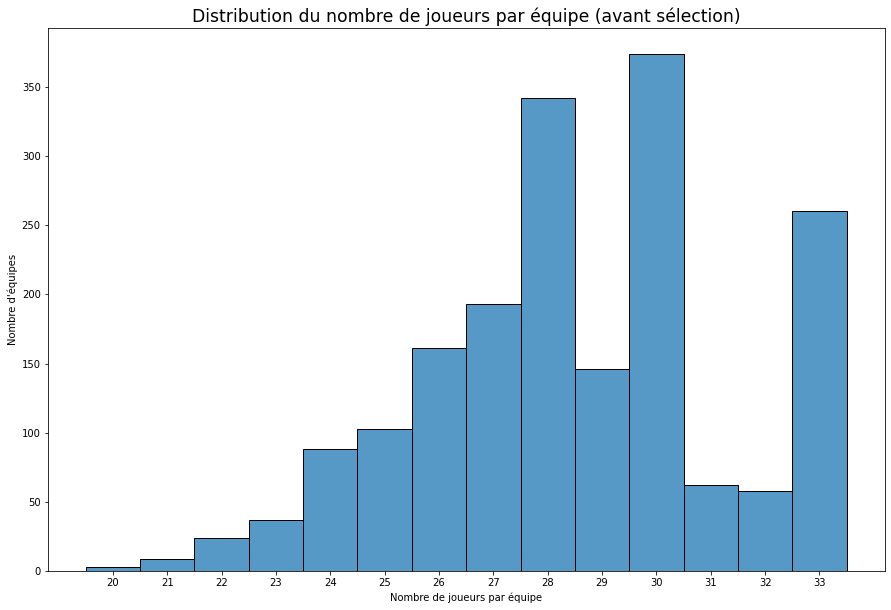

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts() , discrete = True)
plt.xticks(range(FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts().min() , 1 + FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts().max()))
plt.xlabel("Nombre de joueurs par équipe")
plt.ylabel("Nombre d'équipes")
plt.title("Distribution du nombre de joueurs par équipe (avant sélection)" , fontsize = "xx-large");

On observe que le nombre de joueurs varie beaucoup d'une équipe à l'autre (entre 20 et 33).

Essayons de voir ce qui crée ce déséquilibre.

La colonne **team_position** nous donne le poste du joueur dans son équipe.

In [ ]:
FIFA_ratings_selected_players["team_position"].value_counts()

SUB    22176
RES    10501
GK      1859
RCB     1858
LCB     1855
RB      1594
LB      1593
ST      1220
RM      1185
LM      1183
RCM     1177
LCM     1175
CAM      841
LDM      655
RDM      654
RS       628
LS       625
CDM      502
LW       420
RW       418
CB       263
CM       216
LWB      163
RWB      163
LAM       40
RAM       40
CF        40
RF        28
LF        28
Name: team_position, dtype: int64

Tous les postes sont détaillés, sauf si le joueur est remplaçant (*SUB*) ou réserviste (*RES*).

Remplaçons les valeurs de la colonne **team_position** de la manière suivante :


*   SUB = Remplaçant
*   RES = Réserviste
*   Le reste = Titulaire

In [ ]:
for i in FIFA_ratings_selected_players.index:
  if (FIFA_ratings_selected_players.loc[i , "team_position"] != "SUB") & (FIFA_ratings_selected_players.loc[i , "team_position"] != "RES"):
    FIFA_ratings_selected_players.loc[i , "team_position"] = "Titulaire"

FIFA_ratings_selected_players["team_position"] = FIFA_ratings_selected_players["team_position"].replace({"SUB" : "Remplaçant" , "RES" : "Réserviste"})

*   Vérifions cette modification.

In [ ]:
FIFA_ratings_selected_players["team_position"].value_counts()

Remplaçant    22176
Titulaire     20423
Réserviste    10501
Name: team_position, dtype: int64

Regardons désormais le nombre de joueurs titulaires, remplaçants et réservistes dans chaque équipe.

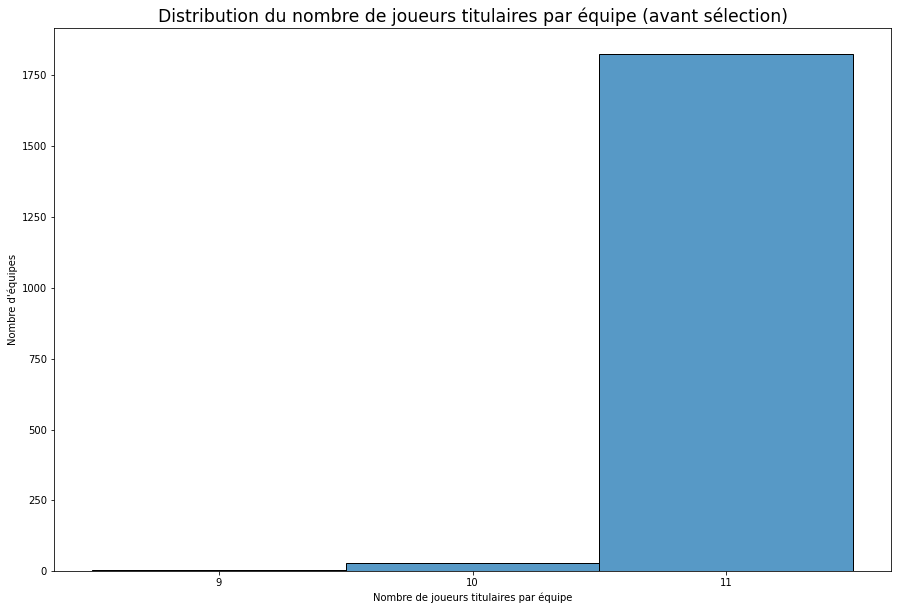

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Titulaire"].groupby(["Season" , "league_name"])["club_name"].value_counts() , discrete = True)
plt.xticks(range(FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Titulaire"].groupby(["Season" , "league_name"])["club_name"].value_counts().min() , 1 + FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Titulaire"].groupby(["Season" , "league_name"])["club_name"].value_counts().max()))
plt.xlabel("Nombre de joueurs titulaires par équipe")
plt.ylabel("Nombre d'équipes")
plt.title("Distribution du nombre de joueurs titulaires par équipe (avant sélection)" , fontsize = "xx-large");

Il n'est pas surprenant de voir que le nombre de joueurs titulaires varie peu, nous nous attendions même à le voir égal à 11 pour toutes les équipes.

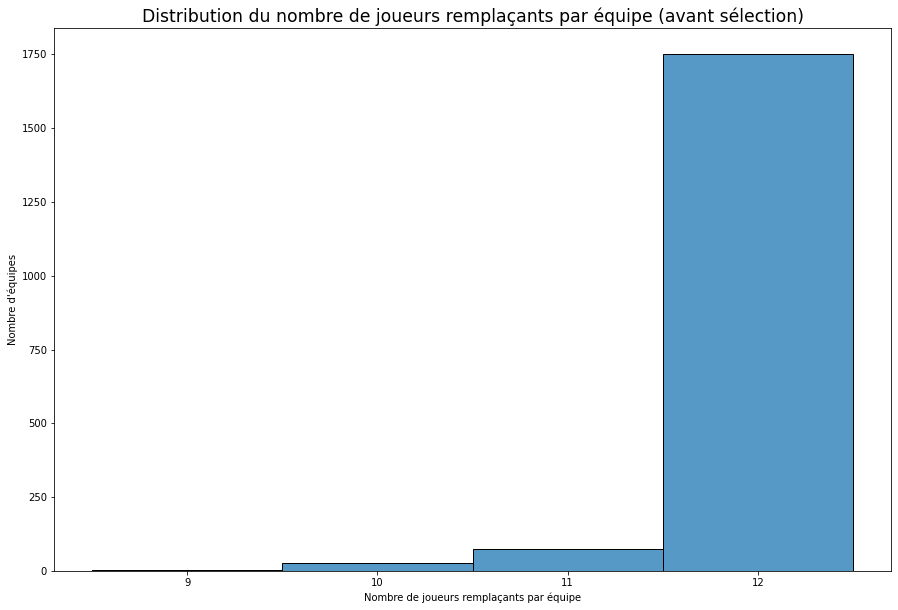

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Remplaçant"].groupby(["Season" , "league_name"])["club_name"].value_counts() , discrete = True)
plt.xticks(range(FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Remplaçant"].groupby(["Season" , "league_name"])["club_name"].value_counts().min() , 1 + FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Remplaçant"].groupby(["Season" , "league_name"])["club_name"].value_counts().max()))
plt.xlabel("Nombre de joueurs remplaçants par équipe")
plt.ylabel("Nombre d'équipes")
plt.title("Distribution du nombre de joueurs remplaçants par équipe (avant sélection)" , fontsize = "xx-large");

Nous constatons que le nombre de joueurs remplaçants ne varie pas beaucoup non plus, avec une très nette proportion d'équipes en comptant 12.

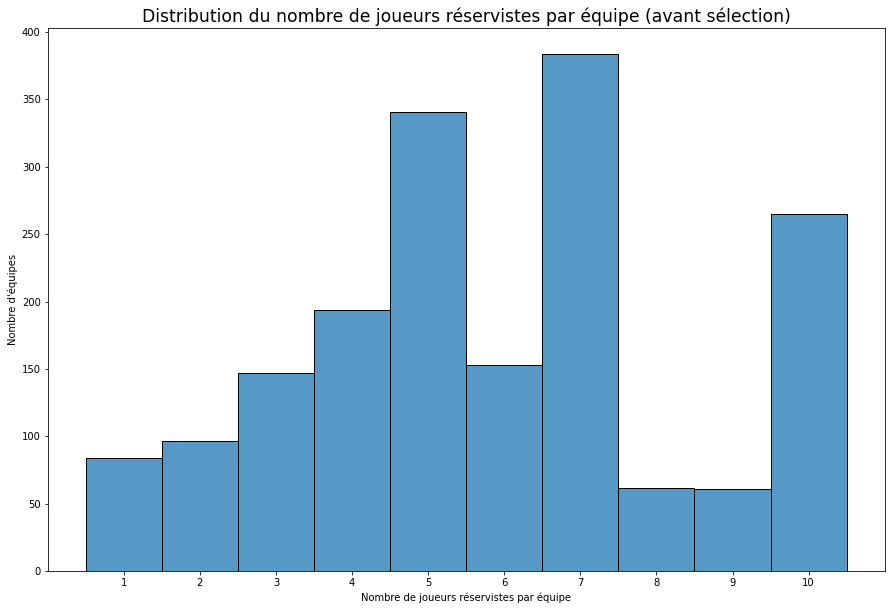

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Réserviste"].groupby(["Season" , "league_name"])["club_name"].value_counts() , discrete = True)
plt.xticks(range(FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Réserviste"].groupby(["Season" , "league_name"])["club_name"].value_counts().min() , 1 + FIFA_ratings_selected_players[FIFA_ratings_selected_players["team_position"] == "Réserviste"].groupby(["Season" , "league_name"])["club_name"].value_counts().max()))
plt.xlabel("Nombre de joueurs réservistes par équipe")
plt.ylabel("Nombre d'équipes")
plt.title("Distribution du nombre de joueurs réservistes par équipe (avant sélection)" , fontsize = "xx-large");

En revanche le nombre de réservistes lui varie beaucoup, c'est donc ce type de joueurs qui fait varier le nombre total de joueurs par équipe.

Regardons l'impact du poste du joueur sur la variable **Overall** qui représente la note globale du joueur.

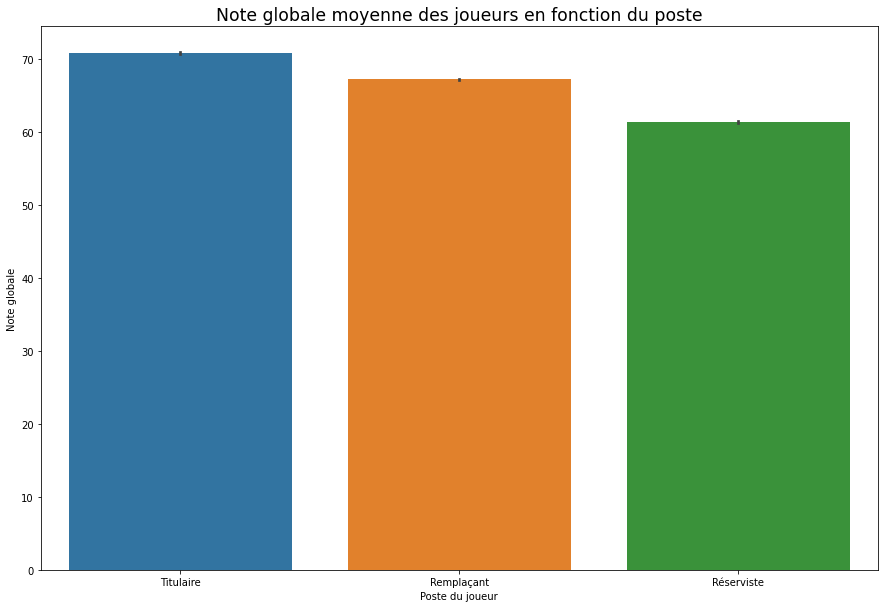

In [ ]:
plt.figure(figsize = (15 , 10))
sns.barplot(data = FIFA_ratings_selected_players , x = "team_position" , y = "overall")
plt.xlabel("Poste du joueur")
plt.ylabel("Note globale")
plt.title("Note globale moyenne des joueurs en fonction du poste" , fontsize = "xx-large");

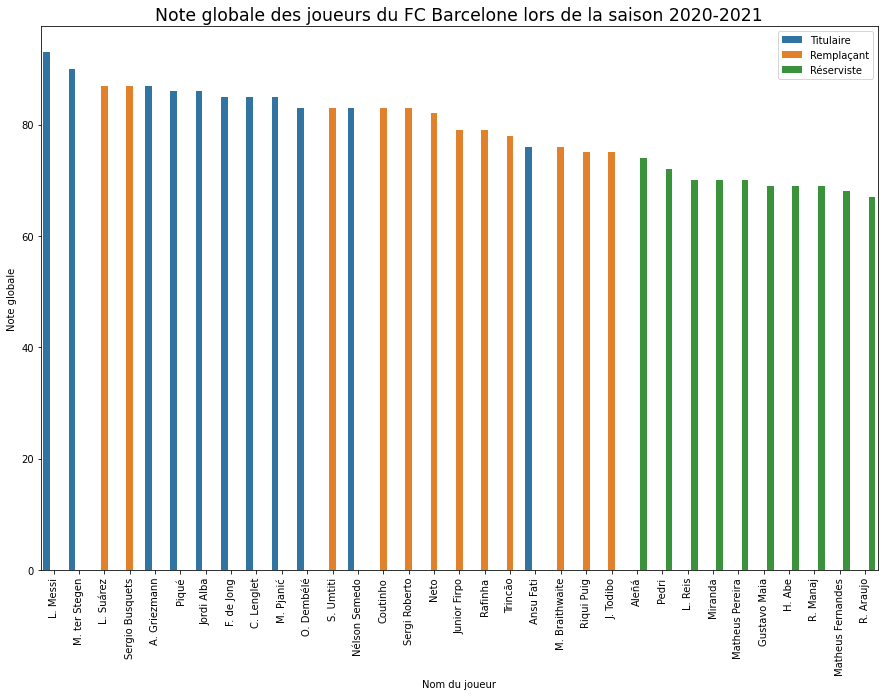

In [ ]:
plt.figure(figsize = (15 , 10))
sns.barplot(data = FIFA_ratings_selected_players[(FIFA_ratings_selected_players["Season"] == "2020-2021") & (FIFA_ratings_selected_players["club_name"] == "FC Barcelona")] , x = "short_name" , y = "overall" , hue = "team_position")
plt.xticks(rotation = 90)
plt.xlabel("Nom du joueur")
plt.ylabel("Note globale")
plt.title("Note globale des joueurs du FC Barcelone lors de la saison 2020-2021" , fontsize = "xx-large")
plt.legend(title = None);

La note globale moyenne des réservistes est significativement inférieure à celles des titulaires et des remplaçants, ce qui parait logique puisque plus les joueurs sont forts, plus ils sont suceptibles de jouer les 1ers rôles.

Si l'on regarde ce qui se passe pour l'équipe du FC Barcelone lors de la saison 2020-2021, tous les réservistes sont les joueurs les moins forts de l'équipe.

Si nous conservons les réservistes, compte-tenu des disparités de nombre que nous avons vues précédemment, les équipes qui en possèdent le plus seront pénalisées. De plus, ce sont des joueurs qui jouent en général très peu voire même pas du tout.

Il est donc plus judicieux de les supprimer et de ne conserver que les joueurs titulaires et remplaçants.

Sachant que nous avons des données spécifiques pour les gardiens de but, il est aussi judicieux de regarder leur nombre, notamment parmi les joueurs remplaçants.

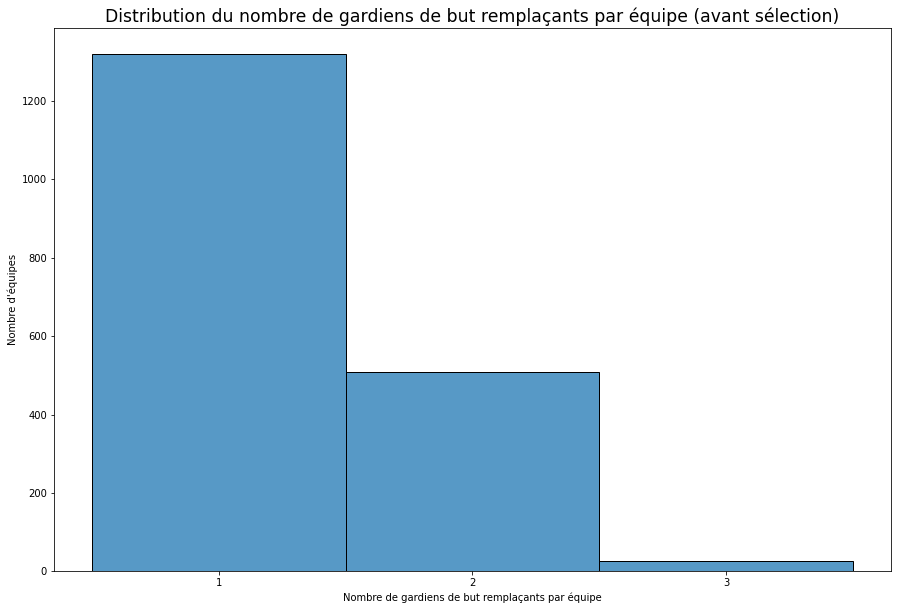

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(FIFA_ratings_selected_players[(FIFA_ratings_selected_players["player_positions"].str.contains("GK")) & (FIFA_ratings_selected_players["team_position"] == "Remplaçant")].groupby(["Season" , "league_name"])["club_name"].value_counts() , discrete = True)
plt.xticks(range(FIFA_ratings_selected_players[(FIFA_ratings_selected_players["player_positions"].str.contains("GK")) & (FIFA_ratings_selected_players["team_position"] == "Remplaçant")].groupby(["Season" , "league_name"])["club_name"].value_counts().min() , 1 + FIFA_ratings_selected_players[(FIFA_ratings_selected_players["player_positions"].str.contains("GK")) & (FIFA_ratings_selected_players["team_position"] == "Remplaçant")].groupby(["Season" , "league_name"])["club_name"].value_counts().max()))
plt.xlabel("Nombre de gardiens de but remplaçants par équipe")
plt.ylabel("Nombre d'équipes")
plt.title("Distribution du nombre de gardiens de but remplaçants par équipe (avant sélection)" , fontsize = "xx-large");

Nous pouvons voir que le nombre de gardiens remplaçants varie en fonction des équipes.

Afin de ne pas pénaliser les équipes possédant plus de gardiens de but, nous ne conserverons qu'un seul gardien remplaçant, celui qui a la valeur la plus élevée selon la colonne **overall** puis **potential**.

*   Création du DataFrame **FIFA_ratings_selected_players** contenant seulement les joueurs titulaires et remplaçants pour chaque équipe, et 1 seul gardien remplaçant.

In [ ]:
FIFA_ratings_selected_players = pd.DataFrame()

for season in matches_results["Season"].unique():
  for division in matches_results[matches_results["Season"] == season]["Division"].unique():  
    for club in FIFA_ratings.loc[(FIFA_ratings["Season"] == season) & (FIFA_ratings["league_name"] == division) , "club_name"].unique():
      df = FIFA_ratings[(FIFA_ratings["club_name"] == club) & (FIFA_ratings["Season"] == season) & (FIFA_ratings["team_position"] != "RES")]
      index = df[(df["team_position"] == "SUB") & (df["player_positions"].str.contains("GK"))].sort_values(by = ["overall" , "potential"] , ascending = False).index[1 :]
      df = df.drop(index = index)
      FIFA_ratings_selected_players = pd.concat([FIFA_ratings_selected_players , df])

*   Réinitialisation de l'index.

In [ ]:
FIFA_ratings_selected_players = FIFA_ratings_selected_players.reset_index(drop = True)

*   Taille du DataFrame **FIFA_ratings_selected_players**.

In [ ]:
FIFA_ratings_selected_players.shape

(42038, 107)

*   Vérification du nombre de joueurs par équipe.

In [ ]:
FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts().sort_values()

Season     league_name             club_name              
2019-2020  Holland Eredivisie      Sparta Rotterdam           20
2015-2016  Spain Primera Division  Villarreal CF              20
           French Ligue 1          Sporting Club de Bastia    20
           English League One      Swindon Town               20
           Scottish Premiership    Kilmarnock                 20
                                                              ..
2017-2018  Italian Serie A         Lazio                      23
                                   Juventus                   23
                                   Hellas Verona              23
                                   Fiorentina                 23
2018-2019  English League One      Shrewsbury                 23
Name: club_name, Length: 1860, dtype: int64

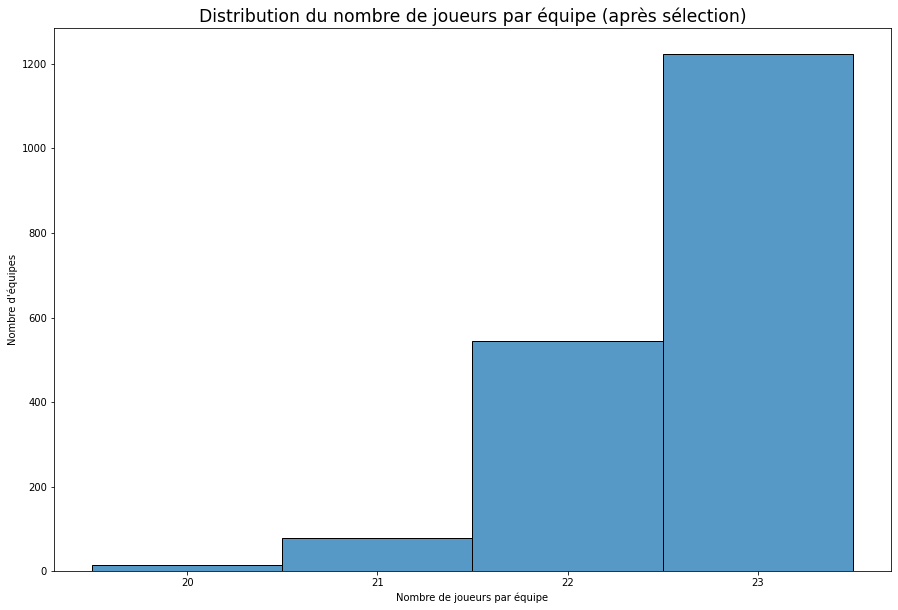

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts() , discrete = True)
plt.xticks(range(FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts().min() , 1 + FIFA_ratings_selected_players.groupby(["Season" , "league_name"])["club_name"].value_counts().max()))
plt.xlabel("Nombre de joueurs par équipe")
plt.ylabel("Nombre d'équipes")
plt.title("Distribution du nombre de joueurs par équipe (après sélection)" , fontsize = "xx-large");

Nous avons désormais un nombre de joueurs par équipe beaucoup plus homogène.

*   Réinitialisation de l'index.

In [ ]:
FIFA_ratings_selected_players = FIFA_ratings_selected_players.reset_index(drop = True)

*   Visualisation du DataFrame **FIFA_ratings_selected_players**.

In [ ]:
FIFA_ratings_selected_players.head()

,sofifa_id,player_url,short_name,long_name,Season,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,200316,https://sofifa.com/player/200316/timo-horn/190002,T. Horn,Timo Horn,2018-2019,25,1993-05-12,192,90,Germany,1. FC Köln,German 2. Bundesliga,2.0,83,87,24000000,20000,GK,Left,2,3,1,Medium/Medium,Normal,No,37800000.0,NaN,GK,1.0,NaN,2011-07-01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,80.0,83.0,86.0,48.0,82.0,Cautious With Crosses,19,13,14,35,14,20,12,15,32,22,45,51,50,80,31,22,64,31,67,17,41,22,15,55,21,20.0,14.0,13,12,83,80,83,82,86,28+1,28+1,28+1,31+0,31+0,31+0,31+0,31+0,34+1,34+1,34+1,32+1,34+1,34+1,34+1,32+1,29+1,31+1,31+1,31+1,29+1,28+1,29+1,29+1,29+1,28+1
1,208334,https://sofifa.com/player/208334/jonas-hector/...,J. Hector,Jonas Hector,2018-2019,28,1990-05-27,185,75,Germany,1. FC Köln,German 2. Bundesliga,2.0,79,79,10000000,30000,"LB, CDM",Left,3,3,3,Medium/Medium,Normal,Yes,15000000.0,NaN,CDM,14.0,NaN,2012-02-25,2023.0,LB,3.0,76.0,60.0,75.0,74.0,78.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,Avoids Using Weaker Foot,79,55,71,78,51,74,65,65,74,77,75,77,67,80,67,69,66,82,76,61,71,81,62,72,65,78.0,76.0,79,79,9,10,10,12,14,69+2,69+2,69+2,72+0,71+0,71+0,71+0,72+0,72+2,72+2,72+2,74+2,75+2,75+2,75+2,74+2,79+0,78+1,78+1,78+1,79+0,78+1,77+2,77+2,77+2,78+1
2,223033,https://sofifa.com/player/223033/jorge-mere-pe...,Jorge Meré,Jorge Meré Pérez,2018-2019,21,1997-04-17,182,80,Spain,1. FC Köln,German 2. Bundesliga,2.0,77,83,10500000,15000,CB,Right,1,3,2,Medium/Medium,Normal,No,17900000.0,NaN,RCB,22.0,NaN,2017-07-20,2022.0,NaN,NaN,68.0,30.0,52.0,62.0,78.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,22,78,74,33,55,34,33,62,69,69,68,67,76,74,48,81,67,72,27,75,79,25,38,51,63.0,76.0,78,77,15,12,11,8,8,52+1,52+1,52+1,52+0,52+0,52+0,52+0,52+0,54+1,54+1,54+1,55+1,60+1,60+1,60+1,55+1,68+1,72+1,72+1,72+1,68+1,70+1,76+1,76+1,76+1,70+1
3,225199,https://sofifa.com/player/225199/vincent-kozie...,V. Koziello,Vincent Edouard André Koziello,2018-2019,22,1995-10-28,168,58,France,1. FC Köln,German 2. Bundesliga,2.0,77,83,12000000,20000,"CM, CDM",Right,2,4,4,Medium/High,Lean,No,20400000.0,#Acrobat,SUB,41.0,NaN,2018-01-16,2022.0,NaN,NaN,76.0,64.0,76.0,78.0,67.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,65,49,81,63,74,72,54,74,79,78,75,90,76,92,65,62,76,34,59,85,77,75,78,60,78.0,54.0,77,71,14,9,14,12,8,68+1,68+1,68+1,75+0,74+0,74+0,74+0,75+0,76+1,76+1,76+1,76+1,76+1,76+1,76+1,76+1,74+1,74+1,74+1,74+1,74+1,73+1,66+1,66+1,66+1,73+1
4,183714,https://sofifa.com/player/183714/simon-terodde...,S. Terodde,Simon Terodde,2018-2019,30,1988-03-02,192,83,Germany,1. FC Köln,German 2. Bundesliga,2.0,76,76,7500000,20000,ST,Right,2,4,3,Medium/Medium,Normal,No,11300000.0,NaN,SUB,9.0,NaN,2018-01-01,2021.0,NaN,NaN,63.0,77.0,54.0,65.0,38.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Header, Chip Shot (AI), Target Forward",50,79,80,

*   Supression des colonnes inexploitables : **sofifa_id**, **player_url**, **short_name**, **long_name**, **ls**, **st**, **rs**, **lw**, **lf**, **cf**, **rf**, **rw**, **lam**, **cam**, **ram**, **lm**, **lcm**, **cm**, **rcm**, **rm**, **lwb**, **ldm**, **cdm**, **rdm**, **rwb**, **lb**, **lcb**, **cb**, **rcb**, **rb**, **dob**, **nationality**, **league_rank**, **work_rate**, **body_type**, **real_face**, **player_tags**, **team_jersey_number**, **loaned_from**, **nation_position**, **nation_jersey_number**, **player_traits**, **release_clause_eur**, **mentality_composure**, **defending_marking**, **team_position**, **player_positions**, **goalkeeping_diving**, **goalkeeping_handling**, **goalkeeping_kicking**, **goalkeeping_positioning**, **goalkeeping_reflexes** et **preferred_foot**.

In [ ]:
FIFA_ratings_selected_players = FIFA_ratings_selected_players.loc[: , "Season" : "goalkeeping_reflexes"]
FIFA_ratings_selected_players = FIFA_ratings_selected_players.drop(columns = ["dob" , "nationality" , "league_rank" , "work_rate" , "body_type" , "real_face" , "player_tags" , "team_jersey_number" , "loaned_from" , "nation_position" , "nation_jersey_number" , "player_traits" , "release_clause_eur" , "mentality_composure" , "defending_marking" , "team_position" , "player_positions" , "goalkeeping_diving" , "goalkeeping_handling" , "goalkeeping_kicking" , "goalkeeping_positioning" , "goalkeeping_reflexes" , "preferred_foot"])

La colonne **joined** correspond à la date à laquelle le joueur à rejoint l'équipe. Nous voudrions la transformer afin de pouvoir calculer par la suite la durée moyenne de présence des joueurs dans une équipe.

*   Traitement de la variable **joined** dans un DataFrame séparé **FIFA_ratings_selected_players_joined**.

In [ ]:
FIFA_ratings_selected_players_joined = FIFA_ratings_selected_players[["Season" , "league_name" , "club_name" , "joined"]].dropna()
FIFA_ratings_selected_players_joined["joined"] = pd.to_datetime(FIFA_ratings_selected_players_joined["joined"]).values.astype(np.int64)
FIFA_ratings_selected_players_joined = pd.to_datetime(FIFA_ratings_selected_players_joined.groupby(["Season" , "league_name" , "club_name"]).mean()["joined"])
FIFA_ratings_selected_players_joined = FIFA_ratings_selected_players_joined.reset_index()

La colonne **contract_valid_until** correspond à la date de fin de contrat du joueur. Nous voudrions la transformer afin de pouvoir calculer par la suite la durée moyenne de contrat restant des joueurs dans une équipe.

*   Traitement de la variable **contract_valid_until**.

In [ ]:
FIFA_ratings_selected_players["contract_valid_until"] = FIFA_ratings_selected_players["contract_valid_until"].astype("int")
season_beginning = FIFA_ratings_selected_players["Season"].apply(lambda x: x[ : 4])
season_beginning = season_beginning.astype("int")
FIFA_ratings_selected_players["contract_valid_until"] = FIFA_ratings_selected_players["contract_valid_until"] - season_beginning

Nous pouvons désormais calculer nos moyennes par équipe.

*   Moyenne du DataFrame selon les variables **Season**, **league_name** et **club_name** pour obtenir des données par équipe,
*   Réinitialisation de l'index.

In [ ]:
FIFA_ratings_selected_players = FIFA_ratings_selected_players.groupby(["Season" , "league_name" , "club_name"]).agg(np.nanmean).reset_index()

*   Réintroduction et traitement de la variable **joined**.

In [ ]:
FIFA_ratings_selected_players = FIFA_ratings_selected_players.merge(right = FIFA_ratings_selected_players_joined , on = ["Season" , "league_name" , "club_name"] , how = "left")
FIFA_ratings_selected_players["joined"] = FIFA_ratings_selected_players["joined"].dt.year
season_beginning = FIFA_ratings_selected_players["Season"].apply(lambda x: x[ : 4])
season_beginning = season_beginning.astype("int")
FIFA_ratings_selected_players["joined"] = season_beginning - FIFA_ratings_selected_players["joined"]

*   Renommage des colonnes.

In [ ]:
FIFA_ratings_selected_players.columns = FIFA_ratings_selected_players.columns.str.replace("_" , " ")
FIFA_ratings_selected_players.columns = FIFA_ratings_selected_players.columns.str.capitalize()
FIFA_ratings_selected_players = FIFA_ratings_selected_players.rename(columns = {"League name" : "Division", "Club name" : "Team" , "Height cm" : "Height (cm)" , "Weight kg" : "Weight (kg)" , "Value eur" : "Value (€)" , "Wage eur" : "Wage (€)"})

*   Visualisation du DataFrame **FIFA_ratings_selected_players**.

In [ ]:
FIFA_ratings_selected_players.head()

,Season,Division,Team,Age,Height (cm),Weight (kg),Overall,Potential,Value (€),Wage (€),International reputation,Weak foot,Skill moves,Contract valid until,Pace,Shooting,Passing,Dribbling,Defending,Physic,Gk diving,Gk handling,Gk kicking,Gk reflexes,Gk speed,Gk positioning,Attacking crossing,Attacking finishing,Attacking heading accuracy,Attacking short passing,Attacking volleys,Skill dribbling,Skill curve,Skill fk accuracy,Skill long passing,Skill ball control,Movement acceleration,Movement sprint speed,Movement agility,Movement reactions,Movement balance,Power shot power,Power jumping,Power stamina,Power strength,Power long shots,Mentality aggression,Mentality interceptions,Mentality positioning,Mentality vision,Mentality penalties,Defending standing tackle,Defending sliding tackle,Joined
0,2014-2015,English League Championship,Birmingham City,25.304348,182.217391,76.782609,65.217391,69.478261,5.615217e+05,6608.695652,1.086957,2.956522,2.260870,1.565217,72.523810,55.476190,57.238095,60.761905,49.571429,69.857143,72.0,66.5,67.5,72.5,37.5,67.0,54.173913,51.521739,51.913043,58.043478,43.130435,54.826087,49.391304,46.565217,53.130435,58.913043,68.173913,70.565217,66.608696,61.608696,65.739130,58.695652,69.304348,70.434783,68.434783,54.043478,61.347826,47.478261,52.695652,53.565217,51.260870,48.043478,47.260870,1
1,2014-2015,English League Championship,Blackburn Rovers,25.869565,183.608696,76.000000,66.869565,70.521739,7.823913e+05,8695.652174,1.086957,3.000000,2.260870,2.000000,70.142857,54.285714,57.523810,61.619048,51.619048,67.714286,70.0,68.0,75.0,69.0,54.5,70.5,52.391304,49.739130,56.521739,59.521739,47.521739,55.565217,48.173913,44.086957,54.391304,60.695652,68.521739,68.956522,64.913043,65.000000,63.608696,57.521739,69.782609,67.478261,68.000000,51.260870,60.173913,48.086957,53.217391,54.130435,50.434783,50.826087,47.043478,2
2,2014-2015,English League Championship,Blackpool,25.739130,183.173913,78.086957,63.347826,66.826087,4.434783e+05,5739.130435,1.000000,2.956522,2.434783,1.043478,68.000000,52.619048,54.047619,59.000000,46.952381,65.666667,68.5,57.5,59.0,67.5,49.5,59.0,47.782609,46.739130,54.478261,54.391304,47.130435,54.086957,47.086957,47.739130,50.043478,56.826087,64.565217,67.652174,62.391304,59.304348,60.695652,60.000000,63.913043,63.260870,69.086957,49.304348,52.086957,46.260870,51.478261,53.000000,51.217391,44.086957,43.260870,0
3,2014-2015,English League Championship,Bolton Wanderers,27.181818,183.500000,75.590909,67.727273,69.727273,1.009318e+06,12181.818182,1.227273,3.045455,2.409091,1.909091,68.250000,56.200000,59.900000,63.250000,55.200000,69.350000,71.5,67.0,64.5,74.5,50.5,68.5,54.636364,51.863636,59.681818,60.818182,51.227273,57.636364,51.409091,46.181818,56.500000,61.318182,66.045455,66.954545,64.409091,64.954545,63.363636,60.500000,66.454545,69.590909,69.590909,52.454545,60.909091,52.000000,52.727273,55.681818,48.272727,53.000000,50.818182,2
4,2014-2015,English League Championship,Bournemouth,26.347826,180.391304,76.391304,66.304348,69.652174,7.093478e+05,7695.652174,1.043478,3.304348,2.521739,2.130435,69.190476,54.666667,60.476190,63.047619,52.809524,67.095238,65.0,66.0,65.5,66.5,42.5,64.5,56.000000,49.043478,52.173913,60.478261,42.304348,57.217391,50.782609,51.130435,56.217391,61.130435,66.956522,66.608696,69.478261,62.478261,67.782609,60.217391,64.434783,68.782609,66.913043,53.304348,58.565217,50.043478,53.478261,56.869565,53.608696,50.260870,48.086957,2


*   Visualisation des infos du DataFrame **FIFA_ratings_selected_players**.

In [ ]:
FIFA_ratings_selected_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860 entries, 0 to 1859
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Season                      1860 non-null   object 
 1   Division                    1860 non-null   object 
 2   Team                        1860 non-null   object 
 3   Age                         1860 non-null   float64
 4   Height (cm)                 1860 non-null   float64
 5   Weight (kg)                 1860 non-null   float64
 6   Overall                     1860 non-null   float64
 7   Potential                   1860 non-null   float64
 8   Value (€)                   1860 non-null   float64
 9   Wage (€)                    1860 non-null   float64
 10  International reputation    1860 non-null   float64
 11  Weak foot                   1860 non-null   float64
 12  Skill moves                 1860 non-null   float64
 13  Contract valid until        1860 

Sachant que chaque match fait intervenir 2 équipes, il faudra effectuer 2 fusions entre les DataFrames **matches_results** et **FIFA_ratings_selected_players** afin d'avoir les données de ces 2 équipes.

*   Création de 2 DataFrames **FIFA_ratings_selected_players_home** (pour les équipes à domicile) et **FIFA_ratings_selected_players_away** (pour les équipes à l'extérieur) et renommage de noms de colonnes afin de pouvoir effectuer la fusion avec le DataFrame **matches_results**.

In [ ]:
FIFA_ratings_selected_players_home = FIFA_ratings_selected_players.add_prefix("Home_")
FIFA_ratings_selected_players_home = FIFA_ratings_selected_players_home.rename(columns = {"Home_Team" : "Home team" , "Home_Season" : "Season" , "Home_Division" : "Division"})
FIFA_ratings_selected_players_away = FIFA_ratings_selected_players.add_prefix("Away_")
FIFA_ratings_selected_players_away = FIFA_ratings_selected_players_away.rename(columns = {"Away_Team" : "Away team" , "Away_Season" : "Season" , "Away_Division" : "Division"})

# **e) Création d'une fonction pour homogénéiser les noms des clubs**

La problématique à ce stade pour pouvoir fusionner nos jeux de données **matches_results** et **FIFA_ratings_selected_players** est que les noms des clubs sont écrits différemment dans les 2 DataFrames.

La 4ème étape consiste donc à créer un dictionnaire qui effectue la correspondance entre les noms des clubs des 2 DataFrames.

*   Création de la fonction qui effectue la correpondance entre les noms des clubs.

In [ ]:
seasons = matches_results["Season"].unique()
dictionnaire_saisons = {}

for season in seasons:
  dictionnaires_clubs = {}
  divisions = matches_results[matches_results["Season"] == season]["Division"].unique()
  for division in divisions:
    clubs_temp1 = list(matches_results[(matches_results["Division"] == division) & (matches_results["Season"] == season)]["Home team"].unique())
    clubs_temp2 = list(matches_results[(matches_results["Division"] == division) & (matches_results["Season"] == season)]["Away team"].unique())
    clubs1 = set(clubs_temp1 + clubs_temp2)
    clubs2 = FIFA_ratings_selected_players[(FIFA_ratings_selected_players["Division"] == division) & (FIFA_ratings_selected_players["Season"] == season)]["Team"].unique()
    
    print(season , division , len(clubs1) , len(clubs2))

    if len(clubs1) > len(clubs2):
      print("\nCertains clubs ne sont pas présents dans le jeu FIFA !")
      raise ValueError
    elif len(clubs1) < len(clubs2):
      print("\nAttention, il manque des matchs !\n")

    dictionnaire_clubs = {}

    for club1 in clubs1:
      words1 = club1.split(" ")
      max_common_letters = 0
      min_uncommon_letters = 100

      for club2 in clubs2:
        words2 = club2.split(" ")
        common_letters = 0
        uncommon_letters = 0

        for word1 in words1:
          for word2 in words2:
            for letters in zip(word1 , word2):
              if (letters[0] == letters[1]):
                common_letters += 1
              else:
                uncommon_letters += 1
      
        if (common_letters > max_common_letters):
          max_common_letters = common_letters
          min_uncommon_letters = uncommon_letters
          corresponding_club = club2
        elif (common_letters == max_common_letters) & (uncommon_letters < min_uncommon_letters):
          max_common_letters = common_letters
          min_uncommon_letters = uncommon_letters
          corresponding_club = club2
    
      if corresponding_club in dictionnaire_clubs.values():
        for k , v in dictionnaire_clubs.items():
          if v == corresponding_club:
            print(k , "/" , v)
            print(club1 , "/" , corresponding_club)
            print("\nCe nom de club est déjà attribué !")
            raise ValueError
      else:
        dictionnaire_clubs[club1] = corresponding_club

    dictionnaires_clubs[division] = dictionnaire_clubs

  dictionnaire_saisons[season] = dictionnaires_clubs

2018-2019 German 2. Bundesliga 18 18
2018-2019 English League Championship 24 24
2018-2019 German 1. Bundesliga 18 18
2018-2019 French Ligue 2 20 20
2018-2019 English League Two 24 24
2018-2019 French Ligue 1 20 20
2018-2019 English League One 24 24
2018-2019 Belgian Jupiler Pro League 16 16
2018-2019 English Premier League 20 20
2018-2019 Holland Eredivisie 18 18
2018-2019 Italian Serie A 20 20
2018-2019 Scottish Premiership 12 12
2018-2019 Spanish Segunda División 22 22
2018-2019 Portuguese Liga ZON SAGRES 18 18
2018-2019 Italian Serie B 19 19
2018-2019 Spain Primera Division 20 20
2018-2019 Turkish Süper Lig 18 18
2019-2020 German 2. Bundesliga 18 18
2019-2020 English League Championship 24 24
2019-2020 German 1. Bundesliga 18 18
2019-2020 French Ligue 2 20 20
2019-2020 English League Two 24 24
2019-2020 French Ligue 1 20 20
2019-2020 English League One 23 24

Attention, il manque des matchs !

2019-2020 Belgian Jupiler Pro League 16 16
2019-2020 English Premier League 20 20
2019-

*   Visualisation du dictionnaire pour effectuer une auto-vérification.

In [ ]:
dictionnaire_saisons

{'2014-2015': {'English League Championship': {'Birmingham': 'Birmingham City',
   'Blackburn': 'Blackburn Rovers',
   'Blackpool': 'Blackpool',
   'Bolton': 'Bolton Wanderers',
   'Bournemouth': 'Bournemouth',
   'Brentford': 'Brentford',
   'Brighton': 'Brighton & Hove Albion',
   'Cardiff': 'Cardiff City',
   'Charlton': 'Charlton Athletic',
   'Derby': 'Derby County',
   'Fulham': 'Fulham',
   'Huddersfield': 'Huddersfield Town',
   'Ipswich': 'Ipswich Town',
   'Leeds': 'Leeds United',
   'Middlesbrough': 'Middlesbrough',
   'Millwall': 'Millwall',
   'Norwich': 'Norwich City',
   "Nott'm Forest": 'Nottingham Forest',
   'Reading': 'Reading',
   'Rotherham': 'Rotherham United',
   'Sheffield Weds': 'Sheffield Wednesday',
   'Watford': 'Watford',
   'Wigan': 'Wigan Athletic',
   'Wolves': 'Wolverhampton Wanderers'},
  'English League One': {'Barnsley': 'Barnsley',
   'Bradford': 'Bradford City',
   'Bristol City': 'Bristol City',
   'Chesterfield': 'Chesterfield',
   'Colchester': 

Une fois le dictionnaire obtenu, nous pouvons remplacer les noms des clubs dans le DataFrame **matches_results** afin qu'ils coïncident avec ceux du DataFrame **FIFA_ratings_selected_players**.

*   Remplacement des noms des clubs dans **Home team** et **Away team**.

In [ ]:
for season in matches_results["Season"].unique():
  for division in matches_results[matches_results["Season"] == season]["Division"].unique():
    matches_results.loc[(matches_results["Season"] == season) & (matches_results["Division"] == division) , "Home team"] = matches_results[(matches_results["Season"] == season) & (matches_results["Division"] == division)]["Home team"].apply(lambda x: dictionnaire_saisons[season][division][x])
    matches_results.loc[(matches_results["Season"] == season) & (matches_results["Division"] == division) , "Away team"] = matches_results[(matches_results["Season"] == season) & (matches_results["Division"] == division)]["Away team"].apply(lambda x: dictionnaire_saisons[season][division][x])

*   Visualisation du DataFrame **matches_results**.

In [ ]:
matches_results.head()

,Season,Division,Date,Home team,Away team,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Max H,Max D,Max A
0,2018-2019,German 2. Bundesliga,2018-08-03,Hamburger SV,Holstein Kiel,0.0,3.0,A,14.0,16.0,3.0,8.0,11.0,11.0,4.0,10.0,1.0,3.0,0.0,0.0,1.78,3.75,5.25
1,2018-2019,German 2. Bundesliga,2018-08-04,VfL Bochum 1848,1. FC Köln,0.0,2.0,A,14.0,15.0,2.0,5.0,17.0,19.0,6.0,1.0,3.0,2.0,0.0,1.0,2.91,3.30,2.62
2,2018-2019,German 2. Bundesliga,2018-08-04,SpVgg Greuther Fürth,SV Sandhausen,3.0,1.0,H,16.0,10.0,5.0,5.0,19.0,11.0,6.0,8.0,1.0,1.0,0.0,0.0,2.40,3.30,3.43
3,2018-2019,German 2. Bundesliga,2018-08-04,SSV Jahn Regensburg,FC Ingolstadt 04,2.0,1.0,H,13.0,13.0,9.0,3.0,23.0,20.0,5.0,9.0,1.0,3.0,0.0,0.0,3.20,3.40,2.40
4,2018-2019,German 2. Bundesliga,2018-08-05,SV Darmstadt 98,SC Paderborn 07,1.0,0.0,H,7.0,7.0,2.0,1.0,14.0,21.0,8.0,3.0,3.0,4.0,0.0,0.0,2.65,3.30,2.95


# **f) Création du jeu de données complet**

Une fois que tout est prêt, la dernière étape consiste à effectuer la fusion entre le DataFrame **matches_results** et les DataFrames **FIFA_ratings_selected_players_home** et **FIFA_ratings_selected_players_away**, puis d'effectuer les moyennes mobiles sur les statistiques des matches afin d'obtenir le jeu de données complet.

*   Création d'un DataFrame **temp_df** qui contient toutes les données : les données des matchs, les données des équipes à domicile et les données des équipes à l'extérieur,
*   Tri chronologique,
*   Réinitialisation de l'index.



In [ ]:
temp_df = matches_results.merge(right = FIFA_ratings_selected_players_home , on = ["Season" , "Division" , "Home team"] , how = "left")
temp_df = temp_df.merge(right = FIFA_ratings_selected_players_away , on = ["Season" , "Division" , "Away team"] , how = "left")
temp_df = temp_df.sort_values(by = "Date")
temp_df = temp_df.reset_index(drop = True)

*   Visualisation du DataFrame **temp_df**.

In [ ]:
temp_df.head()

,Season,Division,Date,Home team,Away team,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Max H,Max D,Max A,Home_Age,Home_Height (cm),Home_Weight (kg),Home_Overall,Home_Potential,Home_Value (€),Home_Wage (€),Home_International reputation,Home_Weak foot,Home_Skill moves,Home_Contract valid until,Home_Pace,Home_Shooting,Home_Passing,Home_Dribbling,Home_Defending,Home_Physic,Home_Gk diving,Home_Gk handling,Home_Gk kicking,Home_Gk reflexes,Home_Gk speed,Home_Gk positioning,Home_Attacking crossing,Home_Attacking finishing,Home_Attacking heading accuracy,Home_Attacking short passing,Home_Attacking volleys,Home_Skill dribbling,Home_Skill curve,Home_Skill fk accuracy,Home_Skill long passing,Home_Skill ball control,Home_Movement acceleration,Home_Movement sprint speed,Home_Movement agility,Home_Movement reactions,Home_Movement balance,Home_Power shot power,Home_Power jumping,Home_Power stamina,Home_Power strength,Home_Power long shots,Home_Mentality aggression,Home_Mentality interceptions,Home_Mentality positioning,Home_Mentality vision,Home_Mentality penalties,Home_Defending standing tackle,Home_Defending sliding tackle,Home_Joined,Away_Age,Away_Height (cm),Away_Weight (kg),Away_Overall,Away_Potential,Away_Value (€),Away_Wage (€),Away_International reputation,Away_Weak foot,Away_Skill moves,Away_Contract valid until,Away_Pace,Away_Shooting,Away_Passing,Away_Dribbling,Away_Defending,Away_Physic,Away_Gk diving,Away_Gk handling,Away_Gk kicking,Away_Gk reflexes,Away_Gk speed,Away_Gk positioning,Away_Attacking crossing,Away_Attacking finishing,Away_Attacking heading accuracy,Away_Attacking short passing,Away_Attacking volleys,Away_Skill dribbling,Away_Skill curve,Away_Skill fk accuracy,Away_Skill long passing,Away_Skill ball control,Away_Movement acceleration,Away_Movement sprint speed,Away_Movement agility,Away_Movement reactions,Away_Movement balance,Away_Power shot power,Away_Power jumping,Away_Power stamina,Away_Power strength,Away_Power long shots,Away_Mentality aggression,Away_Mentality interceptions,Away_Mentality positioning,Away_Mentality vision,Away_Mentality penalties,Away_Defending standing tackle,Away_Defending sliding tackle,Away_Joined
0,2014-2015,French Ligue 1,2014-08-08,Stade de Reims,Paris Saint-Germain,2.0,2.0,D,9.0,16.0,3.0,6.0,15.0,16.0,1.0,5.0,0.0,2.0,0.0,0.0,10.88,4.97,1.40,26.608696,182.434783,75.608696,70.434783,72.652174,1.550000e+06,17739.130435,1.000000,2.782609,2.347826,1.869565,70.523810,52.047619,61.523810,64.952381,55.904762,68.666667,75.5,74.0,63.5,77.0,44.0,72.0,54.913043,46.260870,61.956522,64.782609,48.217391,58.608696,51.869565,44.608696,59.130435,65.000000,66.608696,69.347826,64.782609,67.347826,62.391304,57.260870,67.043478,66.304348,69.217391,49.782609,63.391304,54.869565,49.782609,55.391304,50.521739,53.086957,50.782609,2,26.272727,181.318182,75.500000,79.409091,82.454545,1.165000e+07,112272.727273,2.636364,3.090909,2.772727,2.772727,74.850000,64.300000,72.700000,75.650000,64.550000,74.900000,79.5,77.5,71.5,81.5,46.5,78.5,65.954545,56.363636,65.636364,73.090909,58.090909,69.318182,63.409091,56.272727,67.863636,74.136364,71.045455,73.045455,73.727273,77.409091,65.454545,70.454545,75.000000,73.545455,72.045455,62.318182,73.090909,62.409091,61.681818,68.318182,59.727273,62.500000,59.636364,3
1,2014-2015,English League Championship,2014-08-08,Blackburn Rovers,Cardiff City,1.0,1.0,D,12.0,6.0,3.0,3.0,6.0,14.0,4.0,5.0,1.0,3.0,0.0,0.0,2.30,3.47,3.50,25.869565,183.608696,76.000000,66.869565,70.521739,7.823913e+05,8695.652174,1.086957,3.000000,2.260870,2.000000,70.142857,54.285714,57.523810,61.619048,51.619048,67.714286,70.0,68.0,75.0,69.0,54.5,70.5,52.391304,49.739130,56.521739,59.521739,47.521739,55.565217,48.173913,44.086957,54.391304,60.695652,68.521739,68.956522,64.913043,65.000000,63.608696,57.521739,69.782609,67.478261,68.000000,51.260870,60.173913,48.086957,53.217391,54.130435,50.434783,50.826087,47.043478,2,25.739130,181.956522,75.086957,70.478261,73.565217,1.804348e+06,20304.347826,1.217391,3.1

*   Taille du DataFrame **temp_df**.

In [ ]:
temp_df.shape

(35918, 125)

Sachant que les prédictions sur les matches sont réalisées avant le début de celui-ci, les statistiques des matchs à prédire ne sont pas connues au moment de réaliser la prédiction. Ainsi, nous devons effectuer des moyennes mobiles sur les précédents matchs afin de pouvoir tout de même exploiter ces données. Nous avons décidé, pour chaque équipe lors de chaque saison, d'effectuer une moyenne mobile sur les 1, 3, 5, 20 et 40 précédents matchs (tendances à court-terme et depuis le début de la saison).

Nous avons décidé de calculer des moyenne mobiles seulement sur les nombres de buts marqués et concédés, ainsi que sur les nombres de tirs (totaux et cadrés). Nous n'avons pas jugé pertinent d'en calculer sur les autres données.

*   Calcul des moyennes mobiles pour les colonnes **FTHG**, **FTAG**, **HS**, **AS**, **HST** et **AST**.



In [ ]:
teams = temp_df["Home team"].unique()
seasons = temp_df["Season"].unique()

for team in teams:
  
  for season in seasons:
    
    temp = pd.DataFrame(dtype = "float")
    index = temp_df[(temp_df["Season"] == season) & ((temp_df["Home team"] == team) | (temp_df["Away team"] == team))].index
    
    for i in index:
     
      if temp_df.loc[i , "Home team"] == team:        
        temp.loc[i , "FTGS"] = temp_df.loc[i , "FTHG"]
        temp.loc[i , "FTGC"] = temp_df.loc[i , "FTAG"]
        temp.loc[i , "S"] = temp_df.loc[i , "HS"]
        temp.loc[i , "ST"] = temp_df.loc[i , "HST"]
     
      elif temp_df.loc[i , "Away team"] == team:        
        temp.loc[i , "FTGS"] = temp_df.loc[i , "FTAG"]
        temp.loc[i , "FTGC"] = temp_df.loc[i , "FTHG"]
        temp.loc[i , "S"] = temp_df.loc[i , "AS"]
        temp.loc[i , "ST"] = temp_df.loc[i , "AST"]
      
      else:        
        raise ValueError
    
    temp_1 = temp.rolling(1 , min_periods = 1).mean().shift(fill_value = 0)
    temp_3 = temp.rolling(3 , min_periods = 1).mean().shift(fill_value = 0)
    temp_5 = temp.rolling(5 , min_periods = 1).mean().shift(fill_value = 0)
    temp_40 = temp.rolling(40 , min_periods = 1).mean().shift(fill_value = 0)
    
    index_home = temp_df[(temp_df["Season"] == season) & (temp_df["Home team"] == team)].index
    temp_1_home = temp.loc[index_home].rolling(1 , min_periods = 1).mean().shift(fill_value = 0)
    temp_3_home = temp.loc[index_home].rolling(3 , min_periods = 1).mean().shift(fill_value = 0)
    temp_5_home = temp.loc[index_home].rolling(5 , min_periods = 1).mean().shift(fill_value = 0)
    temp_20_home = temp.loc[index_home].rolling(20 , min_periods = 1).mean().shift(fill_value = 0)

    index_away = temp_df[(temp_df["Season"] == season) & (temp_df["Away team"] == team)].index
    temp_1_away = temp.loc[index_away].rolling(1 , min_periods = 1).mean().shift(fill_value = 0)
    temp_3_away = temp.loc[index_away].rolling(3 , min_periods = 1).mean().shift(fill_value = 0)
    temp_5_away = temp.loc[index_away].rolling(5 , min_periods = 1).mean().shift(fill_value = 0)
    temp_20_away = temp.loc[index_away].rolling(20 , min_periods = 1).mean().shift(fill_value = 0)

    for i in index:
      
      if temp_df.loc[i , "Home team"] == team:        
        
        temp_df.loc[i , "Home_Full time goals scored (1 game)"] = temp_1.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (1 game)"] = temp_1.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (1 game)"] = temp_1.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (1 game)"] = temp_1.loc[i , "ST"]
        
        temp_df.loc[i , "Home_Full time goals scored (home or away) (1 game)"] = temp_1_home.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (home or away) (1 game)"] = temp_1_home.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (home or away) (1 game)"] = temp_1_home.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (home or away) (1 game)"] = temp_1_home.loc[i , "ST"]

        temp_df.loc[i , "Home_Full time goals scored (3 games)"] = temp_3.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (3 games)"] = temp_3.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (3 games)"] = temp_3.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (3 games)"] = temp_3.loc[i , "ST"]
        
        temp_df.loc[i , "Home_Full time goals scored (home or away) (3 games)"] = temp_3_home.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (home or away) (3 games)"] = temp_3_home.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (home or away) (3 games)"] = temp_3_home.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (home or away) (3 games)"] = temp_3_home.loc[i , "ST"]

        temp_df.loc[i , "Home_Full time goals scored (5 games)"] = temp_5.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (5 games)"] = temp_5.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (5 games)"] = temp_5.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (5 games)"] = temp_5.loc[i , "ST"]
        
        temp_df.loc[i , "Home_Full time goals scored (home or away) (5 games)"] = temp_5_home.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (home or away) (5 games)"] = temp_5_home.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (home or away) (5 games)"] = temp_5_home.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (home or away) (5 games)"] = temp_5_home.loc[i , "ST"]

        temp_df.loc[i , "Home_Full time goals scored (home or away) (20 games)"] = temp_20_home.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (home or away) (20 games)"] = temp_20_home.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (home or away) (20 games)"] = temp_20_home.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (home or away) (20 games)"] = temp_20_home.loc[i , "ST"]
        
        temp_df.loc[i , "Home_Full time goals scored (40 games)"] = temp_40.loc[i , "FTGS"]
        temp_df.loc[i , "Home_Full time goals conceded (40 games)"] = temp_40.loc[i , "FTGC"]
        temp_df.loc[i , "Home_Shots (40 games)"] = temp_40.loc[i , "S"]
        temp_df.loc[i , "Home_Shots on target (40 games)"] = temp_40.loc[i , "ST"]
      
      elif temp_df.loc[i , "Away team"] == team:       
        
        temp_df.loc[i , "Away_Full time goals scored (1 game)"] = temp_1.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (1 game)"] = temp_1.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (1 game)"] = temp_1.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (1 game)"] = temp_1.loc[i , "ST"]

        temp_df.loc[i , "Away_Full time goals scored (home or away) (1 game)"] = temp_1_away.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (home or away) (1 game)"] = temp_1_away.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (home or away) (1 game)"] = temp_1_away.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (home or away) (1 game)"] = temp_1_away.loc[i , "ST"]

        temp_df.loc[i , "Away_Full time goals scored (3 games)"] = temp_3.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (3 games)"] = temp_3.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (3 games)"] = temp_3.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (3 games)"] = temp_3.loc[i , "ST"]

        temp_df.loc[i , "Away_Full time goals scored (home or away) (3 games)"] = temp_3_away.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (home or away) (3 games)"] = temp_3_away.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (home or away) (3 games)"] = temp_3_away.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (home or away) (3 games)"] = temp_3_away.loc[i , "ST"]
        
        temp_df.loc[i , "Away_Full time goals scored (5 games)"] = temp_5.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (5 games)"] = temp_5.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (5 games)"] = temp_5.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (5 games)"] = temp_5.loc[i , "ST"]

        temp_df.loc[i , "Away_Full time goals scored (home or away) (5 games)"] = temp_5_away.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (home or away) (5 games)"] = temp_5_away.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (home or away) (5 games)"] = temp_5_away.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (home or away) (5 games)"] = temp_5_away.loc[i , "ST"]

        temp_df.loc[i , "Away_Full time goals scored (home or away) (20 games)"] = temp_20_away.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (home or away) (20 games)"] = temp_20_away.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (home or away) (20 games)"] = temp_20_away.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (home or away) (20 games)"] = temp_20_away.loc[i , "ST"]
        
        temp_df.loc[i , "Away_Full time goals scored (40 games)"] = temp_40.loc[i , "FTGS"]
        temp_df.loc[i , "Away_Full time goals conceded (40 games)"] = temp_40.loc[i , "FTGC"]
        temp_df.loc[i , "Away_Shots (40 games)"] = temp_40.loc[i , "S"]
        temp_df.loc[i , "Away_Shots on target (40 games)"] = temp_40.loc[i , "ST"]
      
      else:
        raise ValueError

Nous voulions aussi avoir une représentation du nombre de points marqués par les équipes sur les précédents matches (Victoire = 3 points, Match Nul = 1 point, Défaite = 0 point) en faisant les mêmes moyennes mobiles que précédemment.

*   Création de nouvelles variables réprésentant la moyenne mobile du nombre de points marqués par les 2 équipes du match.

In [ ]:
teams = temp_df["Home team"].unique()
seasons = temp_df["Season"].unique()

for team in teams:
  
  for season in seasons:
    
    temp = pd.Series(dtype = "float")
    index = temp_df[(temp_df["Season"] == season) & ((temp_df["Home team"] == team) | (temp_df["Away team"] == team))].index
    
    for i in index:
     
      if temp_df.loc[i , "Home team"] == team:
        if temp_df.loc[i , "FTR"] == "H":       
          temp.loc[i] = 3
        elif temp_df.loc[i , "FTR"] == "D":
          temp.loc[i] = 1
        elif temp_df.loc[i , "FTR"] == "A":
          temp.loc[i] = 0
        else:
          raise ValueError
     
      elif temp_df.loc[i , "Away team"] == team:        
        if temp_df.loc[i , "FTR"] == "A":       
          temp.loc[i] = 3
        elif temp_df.loc[i , "FTR"] == "D":
          temp.loc[i] = 1
        elif temp_df.loc[i , "FTR"] == "H":
          temp.loc[i] = 0
        else:
          raise ValueError
      
      else:        
        raise ValueError
    
    temp_1 = temp.rolling(1 , min_periods = 1).mean().shift(fill_value = 0)
    temp_3 = temp.rolling(3 , min_periods = 1).mean().shift(fill_value = 0)
    temp_5 = temp.rolling(5 , min_periods = 1).mean().shift(fill_value = 0)
    temp_40 = temp.rolling(40 , min_periods = 1).mean().shift(fill_value = 0)
    
    index_home = temp_df[(temp_df["Season"] == season) & (temp_df["Home team"] == team)].index
    temp_1_home = temp.loc[index_home].rolling(1 , min_periods = 1).mean().shift(fill_value = 0)
    temp_3_home = temp.loc[index_home].rolling(3 , min_periods = 1).mean().shift(fill_value = 0)
    temp_5_home = temp.loc[index_home].rolling(5 , min_periods = 1).mean().shift(fill_value = 0)
    temp_20_home = temp.loc[index_home].rolling(20 , min_periods = 1).mean().shift(fill_value = 0)

    index_away = temp_df[(temp_df["Season"] == season) & (temp_df["Away team"] == team)].index
    temp_1_away = temp.loc[index_away].rolling(1 , min_periods = 1).mean().shift(fill_value = 0)
    temp_3_away = temp.loc[index_away].rolling(3 , min_periods = 1).mean().shift(fill_value = 0)
    temp_5_away = temp.loc[index_away].rolling(5 , min_periods = 1).mean().shift(fill_value = 0)
    temp_20_away = temp.loc[index_away].rolling(20 , min_periods = 1).mean().shift(fill_value = 0)
    
    for i in index:
      
      if temp_df.loc[i , "Home team"] == team:        
        temp_df.loc[i , "Home_Points (1 game)"] = temp_1.loc[i]
        temp_df.loc[i , "Home_Points (3 games)"] = temp_3.loc[i]
        temp_df.loc[i , "Home_Points (5 games)"] = temp_5.loc[i]
        temp_df.loc[i , "Home_Points (40 games)"] = temp_40.loc[i]

        temp_df.loc[i , "Home_Points (home or away) (1 game)"] = temp_1_home.loc[i]
        temp_df.loc[i , "Home_Points (home or away) (3 games)"] = temp_3_home.loc[i]
        temp_df.loc[i , "Home_Points (home or away) (5 games)"] = temp_5_home.loc[i]
        temp_df.loc[i , "Home_Points (home or away) (20 games)"] = temp_20_home.loc[i]

      elif temp_df.loc[i , "Away team"] == team:       
        temp_df.loc[i , "Away_Points (1 game)"] = temp_1.loc[i]
        temp_df.loc[i , "Away_Points (3 games)"] = temp_3.loc[i]
        temp_df.loc[i , "Away_Points (5 games)"] = temp_5.loc[i]
        temp_df.loc[i , "Away_Points (40 games)"] = temp_40.loc[i]

        temp_df.loc[i , "Away_Points (home or away) (1 game)"] = temp_1_away.loc[i]
        temp_df.loc[i , "Away_Points (home or away) (3 games)"] = temp_3_away.loc[i]
        temp_df.loc[i , "Away_Points (home or away) (5 games)"] = temp_5_away.loc[i]
        temp_df.loc[i , "Away_Points (home or away) (20 games)"] = temp_20_away.loc[i]

      else:
        raise ValueError

*   Réinitialisation de l'index.

In [ ]:
temp_df = temp_df.reset_index(drop = True)

*   Visualisation du DataFrame **temp_df**.

In [ ]:
temp_df.head()

,Season,Division,Date,Home team,Away team,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Max H,Max D,Max A,Home_Age,Home_Height (cm),Home_Weight (kg),Home_Overall,Home_Potential,Home_Value (€),Home_Wage (€),Home_International reputation,Home_Weak foot,Home_Skill moves,Home_Contract valid until,Home_Pace,Home_Shooting,Home_Passing,Home_Dribbling,Home_Defending,Home_Physic,Home_Gk diving,Home_Gk handling,Home_Gk kicking,Home_Gk reflexes,Home_Gk speed,Home_Gk positioning,Home_Attacking crossing,Home_Attacking finishing,Home_Attacking heading accuracy,Home_Attacking short passing,Home_Attacking volleys,Home_Skill dribbling,Home_Skill curve,Home_Skill fk accuracy,Home_Skill long passing,Home_Skill ball control,Home_Movement acceleration,Home_Movement sprint speed,Home_Movement agility,Home_Movement reactions,Home_Movement balance,Home_Power shot power,Home_Power jumping,Home_Power stamina,Home_Power strength,Home_Power long shots,Home_Mentality aggression,Home_Mentality interceptions,Home_Mentality positioning,Home_Mentality vision,Home_Mentality penalties,Home_Defending standing tackle,Home_Defending sliding tackle,Home_Joined,Away_Age,Away_Height (cm),Away_Weight (kg),Away_Overall,Away_Potential,Away_Value (€),Away_Wage (€),Away_International reputation,Away_Weak foot,Away_Skill moves,Away_Contract valid until,Away_Pace,Away_Shooting,Away_Passing,Away_Dribbling,Away_Defending,Away_Physic,Away_Gk diving,Away_Gk handling,Away_Gk kicking,Away_Gk reflexes,Away_Gk speed,Away_Gk positioning,Away_Attacking crossing,Away_Attacking finishing,Away_Attacking heading accuracy,Away_Attacking short passing,Away_Attacking volleys,Away_Skill dribbling,Away_Skill curve,Away_Skill fk accuracy,Away_Skill long passing,Away_Skill ball control,Away_Movement acceleration,Away_Movement sprint speed,Away_Movement agility,Away_Movement reactions,Away_Movement balance,Away_Power shot power,Away_Power jumping,Away_Power stamina,Away_Power strength,Away_Power long shots,Away_Mentality aggression,Away_Mentality interceptions,Away_Mentality positioning,Away_Mentality vision,Away_Mentality penalties,Away_Defending standing tackle,Away_Defending sliding tackle,Away_Joined,Home_Full time goals scored (1 game),Home_Full time goals conceded (1 game),Home_Shots (1 game),Home_Shots on target (1 game),Home_Full time goals scored (home or away) (1 game),Home_Full time goals conceded (home or away) (1 game),Home_Shots (home or away) (1 game),Home_Shots on target (home or away) (1 game),Home_Full time goals scored (3 games),Home_Full time goals conceded (3 games),Home_Shots (3 games),Home_Shots on target (3 games),Home_Full time goals scored (home or away) (3 games),Home_Full time goals conceded (home or away) (3 games),Home_Shots (home or away) (3 games),Home_Shots on target (home or away) (3 games),Home_Full time goals scored (5 games),Home_Full time goals conceded (5 games),Home_Shots (5 games),Home_Shots on target (5 games),Home_Full time goals scored (home or away) (5 games),Home_Full time goals conceded (home or away) (5 games),Home_Shots (home or away) (5 games),Home_Shots on target (home or away) (5 games),Home_Full time goals scored (home or away) (20 games),Home_Full time goals conceded (home or away) (20 games),Home_Shots (home or away) (20 games),Home_Shots on target (home or away) (20 games),Home_Full time goals scored (40 games),Home_Full time goals conceded (40 games),Home_Shots (40 games),Home_Shots on target (40 games),Away_Full time goals scored (1 game),Away_Full time goals conceded (1 game),Away_Shots (1 game),Away_Shots on target (1 game),Away_Full time goals scored (home or away) (1 game),Away_Full time goals conceded (home or away) (1 game),Away_Shots (home or away) (1 game),Away_Shots on target (home or away) (1 game),Away_Full time goals scored (3 games),Away_Full time goals conceded (3 games),Away_Shots (3 games),Away_Shots on target (3 games),Away_Full time goals scored (home or away) (3 games),Away_Full time goals conceded (home or away) 

*   Taille du DataFrame **temp_df**.

In [ ]:
temp_df.shape

(35918, 205)

À ce stade, le jeu de données contient beaucoup de variables, la plupart d'entre elles sont doublées entre l'équipe à domicile et celle à l'extérieur.

Pour toutes les données relatives aux équipes, nous allons effectuer la soustraction, pour une même variable, entre sa valeur pour l'équipe à domicile et celle pour l'équipe à l'extérieur, ce qui réduira considérablement le nombre de variables.



*   Séparation du DataFrame **temp_df** en 3 DataFrames :
  *   **df_matches_results** contenant les données des matchs,
  *   **df_home** contenant les données des équipes à domicile,
  *   **df_away** contenant les données des équipes à l'extérieur.






In [ ]:
df_matches_results = temp_df.loc[: , : "Max A"]
df_home = temp_df.loc[: , temp_df.columns[temp_df.columns.str.contains("Home_")]]
df_away = temp_df.loc[: , temp_df.columns[temp_df.columns.str.contains("Away_")]]

*   Renommage de colonnes afin d'avoir les mêmes noms dans les 2 DataFrames **df_home** et **df_away**.

In [ ]:
df_home.columns = [x.replace("Home_" , "") for x in df_home.columns]
df_away.columns = [x.replace("Away_" , "") for x in df_away.columns]

* Création du DataFrame complet **df** en joignant au DataFrame **df_matches_results** la différence entre les DataFrames **df_home** et **df_away**.

In [ ]:
df = df_matches_results.join(df_home - df_away)

Nous n'utiliserons pas directement les colonnes **Max H**, **Max D** et **Max A** comme variables explicatives de nos modèles de Machine Learning, cependant, nous souhaitions tout de même garder une information sur les cotes.

*   Création d'une variable **Cote**, qui est la différence entre la cote **Max A** et la cote **Max H**.

In [ ]:
df["Cote"] = df["Max A"] - df["Max H"]

*   Réinitialisation de l'index

In [ ]:
df = df.reset_index(drop = True)

*   Réorganisation des colonnes.

In [ ]:
cols1 = list(df.loc[: , "Season" : "Max A"].columns)
cols2 = list(df.loc[: , "Full time goals scored (1 game)" : ].columns)
cols3 = list(df.loc[: , "Age" : "Joined"].columns)
cols = cols1 + cols2 + cols3
df = df[cols]

*   Visualisation du DataFrame **df**.

In [ ]:
df.head()

,Season,Division,Date,Home team,Away team,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Max H,Max D,Max A,Full time goals scored (1 game),Full time goals conceded (1 game),Shots (1 game),Shots on target (1 game),Full time goals scored (home or away) (1 game),Full time goals conceded (home or away) (1 game),Shots (home or away) (1 game),Shots on target (home or away) (1 game),Full time goals scored (3 games),Full time goals conceded (3 games),Shots (3 games),Shots on target (3 games),Full time goals scored (home or away) (3 games),Full time goals conceded (home or away) (3 games),Shots (home or away) (3 games),Shots on target (home or away) (3 games),Full time goals scored (5 games),Full time goals conceded (5 games),Shots (5 games),Shots on target (5 games),Full time goals scored (home or away) (5 games),Full time goals conceded (home or away) (5 games),Shots (home or away) (5 games),Shots on target (home or away) (5 games),Full time goals scored (home or away) (20 games),Full time goals conceded (home or away) (20 games),Shots (home or away) (20 games),Shots on target (home or away) (20 games),Full time goals scored (40 games),Full time goals conceded (40 games),Shots (40 games),Shots on target (40 games),Points (1 game),Points (3 games),Points (5 games),Points (40 games),Points (home or away) (1 game),Points (home or away) (3 games),Points (home or away) (5 games),Points (home or away) (20 games),Cote,Age,Height (cm),Weight (kg),Overall,Potential,Value (€),Wage (€),International reputation,Weak foot,Skill moves,Contract valid until,Pace,Shooting,Passing,Dribbling,Defending,Physic,Gk diving,Gk handling,Gk kicking,Gk reflexes,Gk speed,Gk positioning,Attacking crossing,Attacking finishing,Attacking heading accuracy,Attacking short passing,Attacking volleys,Skill dribbling,Skill curve,Skill fk accuracy,Skill long passing,Skill ball control,Movement acceleration,Movement sprint speed,Movement agility,Movement reactions,Movement balance,Power shot power,Power jumping,Power stamina,Power strength,Power long shots,Mentality aggression,Mentality interceptions,Mentality positioning,Mentality vision,Mentality penalties,Defending standing tackle,Defending sliding tackle,Joined
0,2014-2015,French Ligue 1,2014-08-08,Stade de Reims,Paris Saint-Germain,2.0,2.0,D,9.0,16.0,3.0,6.0,15.0,16.0,1.0,5.0,0.0,2.0,0.0,0.0,10.88,4.97,1.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.48,0.335968,1.116601,0.108696,-8.974308,-9.802372,-1.010000e+07,-94533.596838,-1.636364,-0.308300,-0.424901,-0.903162,-4.326190,-12.252381,-11.176190,-10.697619,-8.645238,-6.233333,-4.0,-3.5,-8.0,-4.5,-2.5,-6.5,-11.041502,-10.102767,-3.679842,-8.308300,-9.873518,-10.709486,-11.539526,-11.664032,-8.733202,-9.136364,-4.436759,-3.697628,-8.944664,-10.061265,-3.063241,-13.193676,-7.956522,-7.241107,-2.828063,-12.535573,-9.699605,-7.539526,-11.899209,-12.926877,-9.205534,-9.413043,-8.853755,-1
1,2014-2015,English League Championship,2014-08-08,Blackburn Rovers,Cardiff City,1.0,1.0,D,12.0,6.0,3.0,3.0,6.0,14.0,4.0,5.0,1.0,3.0,0.0,0.0,2.30,3.47,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20,0.130435,1.652174,0.913043,-3.608696,-3.043478,-1.021957e+06,-11608.695652,-0.130435,-0.173913,-0.260870,-0.782609,-1.238095,-4.047619,-4.047619,-4.095238,1.380952,-0.190476,-1.5,2.5,13.5,-4.0,5.5,4.5,-3.434783,-3.608696,-2.130435,-3.695652,-4.565217,-4.347826,-4.652174,-4.826087,-2.043478,-4.521739,0.130435,-1.217391,-1.521739,-2.217391,-2.000000,-3.304348,2.000000,-1.695652,0.478261,-4.521739,0.130435,-1.695652,-2.652174,-3.000000,-3.478261,2.652174,0.173913,1
2,2014-2015,English League One,2014-08-09,Colchester United,Oldham Athletic,2.0,2.0,D,13.0,10.0,5.0,3.0,6.0,5.0,8.0,4.0,0.0,0.0,0.0,0.0,2.70,3.40,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

*   Visualisation des infos du DataFrame **df**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35918 entries, 0 to 35917
Columns: 115 entries, Season to Joined
dtypes: datetime64[ns](1), float64(108), int64(1), object(5)
memory usage: 31.5+ MB


*   Export CSV du DataFrame **df**.

In [ ]:
df.to_csv("drive/MyDrive/Formations/DataScientest/Projet/Projet paris sportifs/Données d'entrée/Jeu de données complet.csv")

# **g) Création du jeu de données pour le Machine Learning** 

Jusqu'à présent, à part supprimer des colonnes inexploitables, nous ne nous sommes pas réellement posé la question de la pertinence de nos variables explicatives pour le Machine Learning. Avec 35918 matchs pour lesquels nous avons 115 variables explicatives, nous ne pourrons pas exécuter notre Machine Learning dans des temps raisonnables.

Créons tout d'abord le DataFrame **df_ml** pour le Machine Learning à partir du DataFrame **df**.

*   Création du DataFrame **df_ml**.

In [ ]:
df_ml = df

Supprimons ensuite les colonnes relatives aux statistiques des matches, puisque nous avons créé de nouvelles colonnes grâce aux moyennes mobiles.

*   Suppression des colonnes **FTHG** jusqu'à **AR** (en conservant **FTR** qui est notre variable cible).

In [ ]:
df_ml = df_ml.drop(columns = ["FTHG"	, "FTAG" , "HS" , "AS" , "HST" , "AST" , "HF" , "AF" , "HC" , "AC" , "HY" , "AY" , "HR" , "AR"])

Il y a beaucoup de variables provenant du jeu vidéo FIFA qui sont trop spécifiques et détaillées, c'est pourquoi nous avons décidé de ne pas les conserver.

*   Suppression des colonnes **Gk_diving** jusqu'à **Defending sliding tackle**.
*   Suppression des colonnes **Weak_foot** et **Skill moves**.

In [ ]:
df_ml = df_ml.loc[: , : "Physic"].join(df_ml["Joined"])
df_ml = df_ml.drop(columns = ["Weak foot"	, "Skill moves"])

Les variables représentant la durée de présence au club et la durée de validité restante du contrat nous ont paru moins pertinentes que le reste, nous avons décidé de ne pas les conserver.

*   Suppression des colonnes **Contract valid until** et **Joined**.

In [ ]:
df_ml = df_ml.drop(columns = ["Contract valid until"	, "Joined"])

Les variables **Height (cm)** et **Weight (kg)** sont des attributs liés au physique, ce qui nous a paru redondant avec la variables **Physic** même si elles ne sont pas très corrélées entre elles.



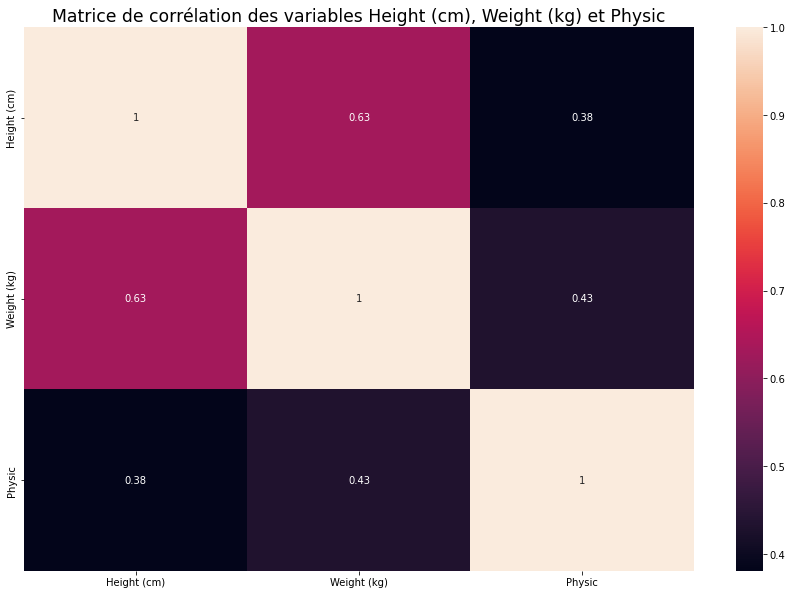

In [ ]:
plt.figure(figsize = (15 , 10))
sns.heatmap(df_ml[["Height (cm)" , "Weight (kg)" , "Physic"]].corr() , annot = True)
plt.title("Matrice de corrélation des variables Height (cm), Weight (kg) et Physic" , fontsize = "xx-large");

*   Suppression des colonnes **Height (cm)** et **Weight (kg)**.

In [ ]:
df_ml = df_ml.drop(columns = ["Height (cm)"	, "Weight (kg)"])

Les variables **Value (€)**, **Wage (€)** et **International reputation** sont des variables qui représentent la valeur marchande moyenne de l'équipe sur le marché des transferts (en €), le salaire moyen de l'équipe (en €), et la réputation de l'équipe à l'international. Elles semblent toutes les 3 être liées puisque plus la réputation internationale d'un joueur est élevée, plus sa valeur marchande risque d'être élevée ainsi que son salaire.

Regardons la matrice de corrélation entre les variables **Value (€)**, **Wage (€)** et **International reputation**.

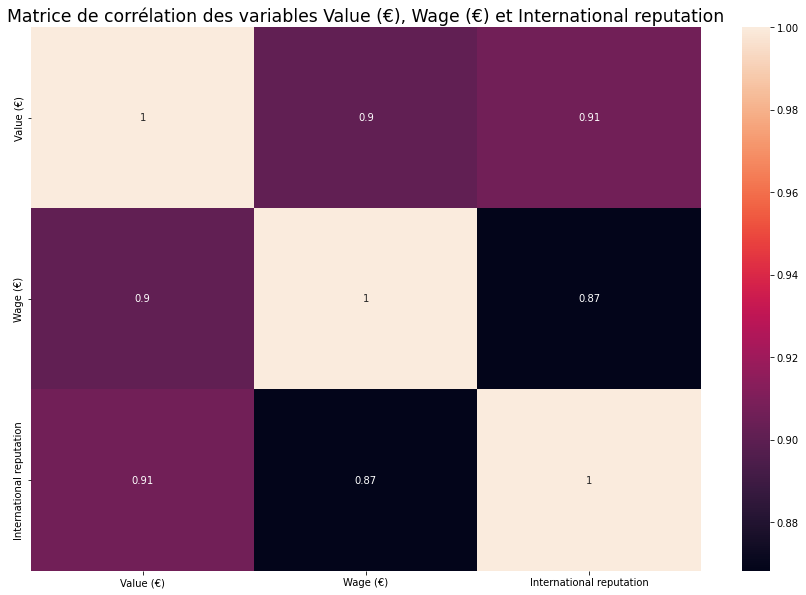

In [ ]:
plt.figure(figsize = (15 , 10))
sns.heatmap(df_ml[["Value (€)" , "Wage (€)" , "International reputation"]].corr() , annot = True)
plt.title("Matrice de corrélation des variables Value (€), Wage (€) et International reputation" , fontsize = "xx-large");

En effet, nous constatons que ces 3 variables sont très corrélées entre elles (les coefficients de corrélations sont supérieurs à 0,87). Value (€) est la variable qui possède les coefficients de corrélation les plus élevés (0,9 avec Wage (€) et 0,91 avec International reputation), nous conserverons donc uniquement Value (€).

In [ ]:
df_ml = df_ml.drop(columns = ["Wage (€)"	, "International reputation"])

Parmi les variables restantes, nous avons **Overall** et **Potential**. **Overall** est une variable essentielle de notre jeu de données puisqu'elle représente la note globale moyenne de l'équipe. **Potential** représente quant à elle la note globale potentielle moyenne de l'équipe, c'est à dire la notre globale moyenne maximale que l'équipe peut espérer atteindre.
Ces 2 variables semblent donc liées.

Regardons la matrice de corrélation entre les variables **Overall** et **Potential**.

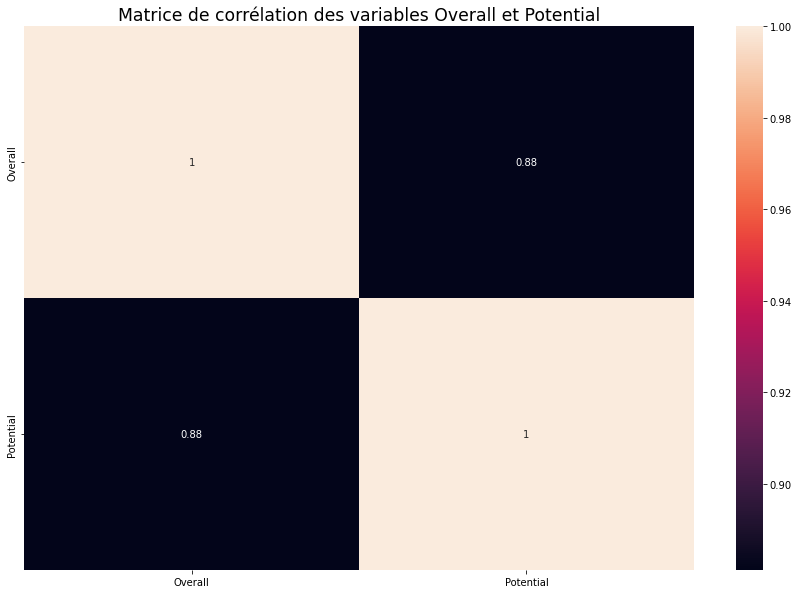

In [ ]:
plt.figure(figsize = (15 , 10))
sns.heatmap(df_ml[["Overall" , "Potential"]].corr() , annot = True)
plt.title("Matrice de corrélation des variables Overall et Potential" , fontsize = "xx-large");

Effectivement, les variables **Overall** et **Potential** sont très corrélées (le coefficient de corrélation vaut 0,88).
Cependant, nous avons souhaité conservé ces 2 variables puisqu'il nous a semblé que **Potential** apportait une information supplémentaire utile.

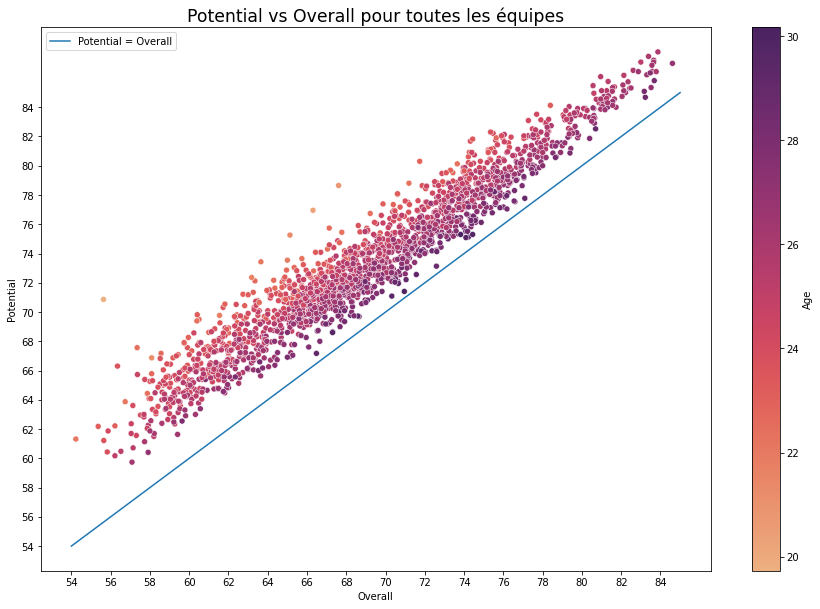

In [ ]:
fig , ax = plt.subplots(figsize = (15 , 10))
sns.scatterplot(data = FIFA_ratings_selected_players , x = "Overall" , y = "Potential" , hue = "Age" , ax = ax , legend = None , palette = "flare")
sns.lineplot(x = np.arange(54 , 86) , y = np.arange(54 , 86) , label = "Potential = Overall")
ax.set_xticks(np.arange(54 , 86 , 2))
ax.set_yticks(np.arange(54 , 86 , 2))
plt.legend(loc = "upper left")
norm = plt.Normalize(FIFA_ratings_selected_players["Age"].min(), FIFA_ratings_selected_players["Age"].max())
sm = plt.cm.ScalarMappable(norm = norm , cmap = "flare")
plt.colorbar(sm , ax = ax , label = "Age")
plt.title("Potential vs Overall pour toutes les équipes" , fontsize = "xx-large");

Sur le graphe ci-dessus, on peut voir que Potential est toujours supérieur à Overall. De plus, on remarque que plus l'équipe est jeune, plus l'écart entre Overall et Potential est élevé (plus on s'éloigne de la courbe Potential = Overall), ce qui illustre bien que Overall représente le niveau actuel tandis que Potential représente le niveau majoré de la marge de progression.

Précédemment, nous avions créé une variable **Cote** afin de conserver l'information des cotes pour le Machine Learning. En effet, pour nos modèles de Machine Learning, nous n'utiliserons pas les variables **Max H**, **Max D** et **Max A** comme variables explicatives. Cependant, ces variables nous serons très utiles au moment d'identifier les *Value Bets* et de calculer les gains. Justement, pour que l'identification des *Value Bets* ne soit pas faussée, nous ne devons pas avoir de valeurs de cotes trop extrêmes. Avant de supprimer les variables **Max H**, **Max D** et **Max A**, penchons-nous donc sur leurs distributions afin d'identifier les outliers.

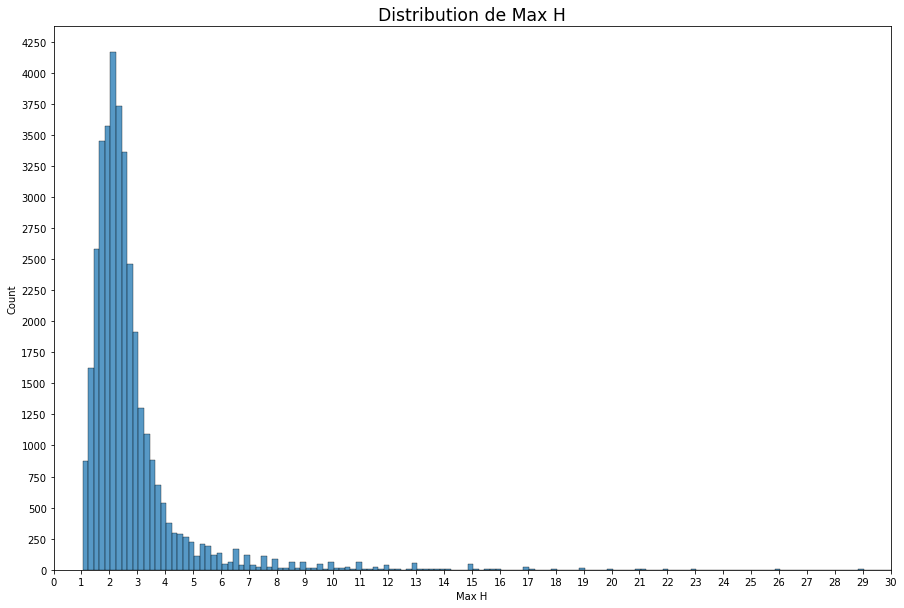

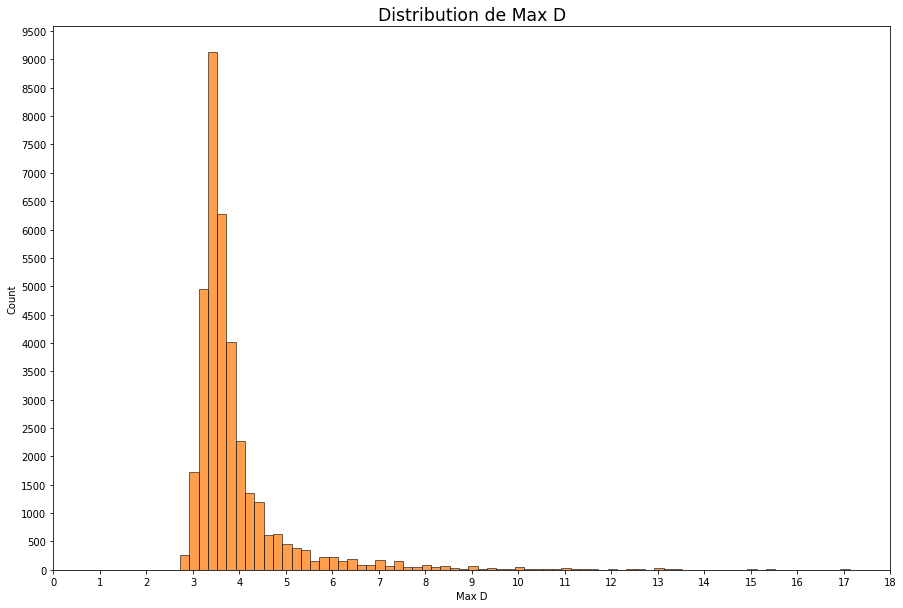

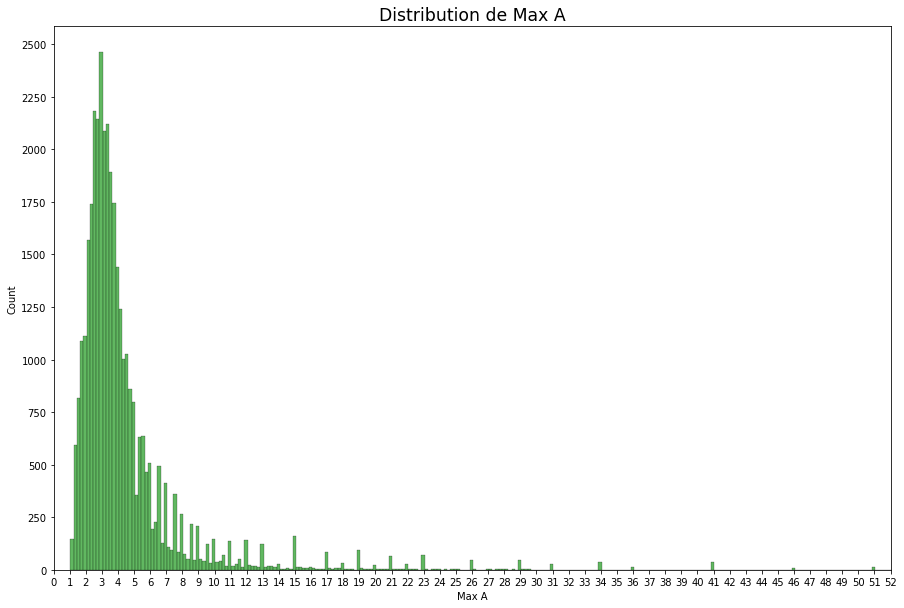

In [ ]:
plt.figure(figsize = (15 , 10))
plt.title("Distribution de Max H" , fontsize = "xx-large")
sns.histplot(data = df_ml , x = "Max H" , color = "#1f77b4" , binwidth = 0.2)
plt.xlim(0 , 30)
plt.xticks(np.arange(0 , 31 , 1))
plt.yticks(np.arange(0 , 4251 , 250))
plt.figure(figsize = (15 , 10))
plt.title("Distribution de Max D" , fontsize = "xx-large")
sns.histplot(data = df_ml , x = "Max D" , color = "#ff7f0e" , binwidth = 0.2)
plt.xlim(0 , 18)
plt.xticks(np.arange(0 , 19 , 1))
plt.yticks(np.arange(0 , 9501 , 500))
plt.figure(figsize = (15 , 10))
plt.title("Distribution de Max A" , fontsize = "xx-large")
sns.histplot(data = df_ml , x = "Max A" , color = "#2ca02c" , binwidth = 0.2)
plt.xlim(0 , 52)
plt.xticks(np.arange(0 , 53 , 1))
plt.yticks(np.arange(0 , 2501 , 250));

Nous pouvons voir que ces distributions possèdent des outliers jusqu'à des valeurs très élevées par rapport à la distribution de valeurs. Ainsi, nous avons décidé de ne conserver que les cotes inférieures ou égales à 10 afin de supprimer ces outliers.


*   Suppression des matchs pour lesquels l'une des cotes est supérieure à 10 (outliers).

In [ ]:
df_ml = df_ml[(df[["Max H" , "Max D" , "Max A"]] <= 10).all(axis = 1)]

*   Taille du DataFrame **df_ml**.

In [ ]:
df_ml.shape

(33524, 60)

Nous sommes passés de 35918 à 33524 matchs, nous n'avons donc pas trop impacté notre volume de matchs.

Regardons les nouvelles distributions de nos cotes.

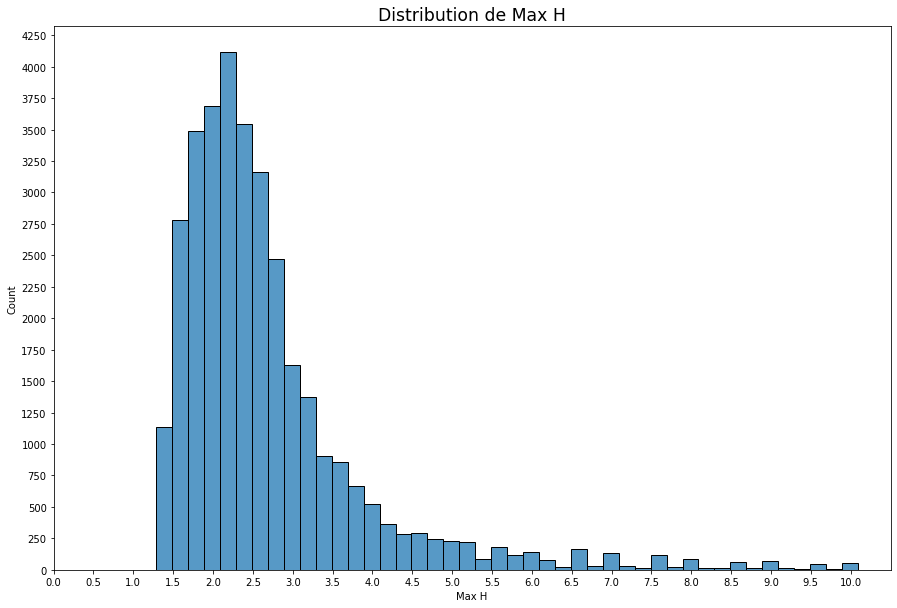

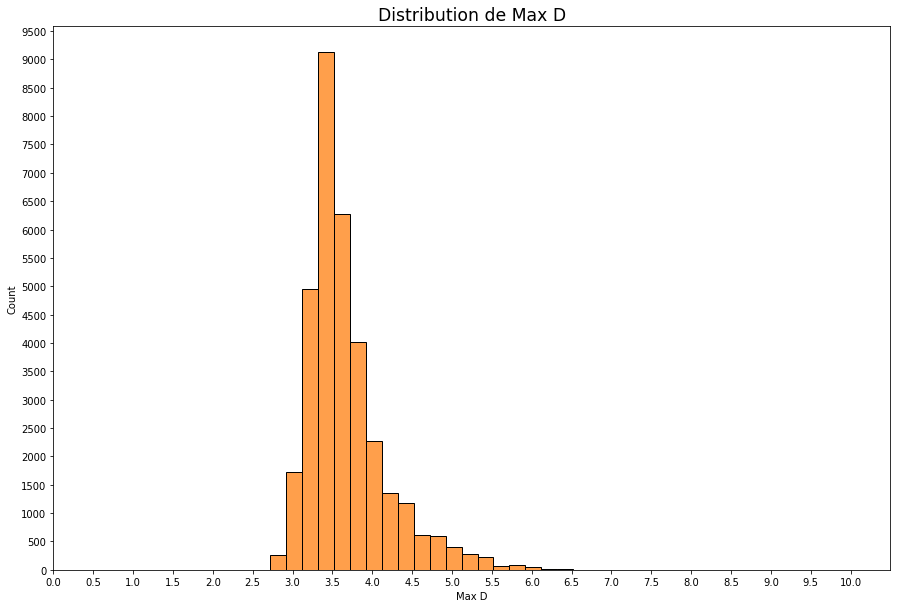

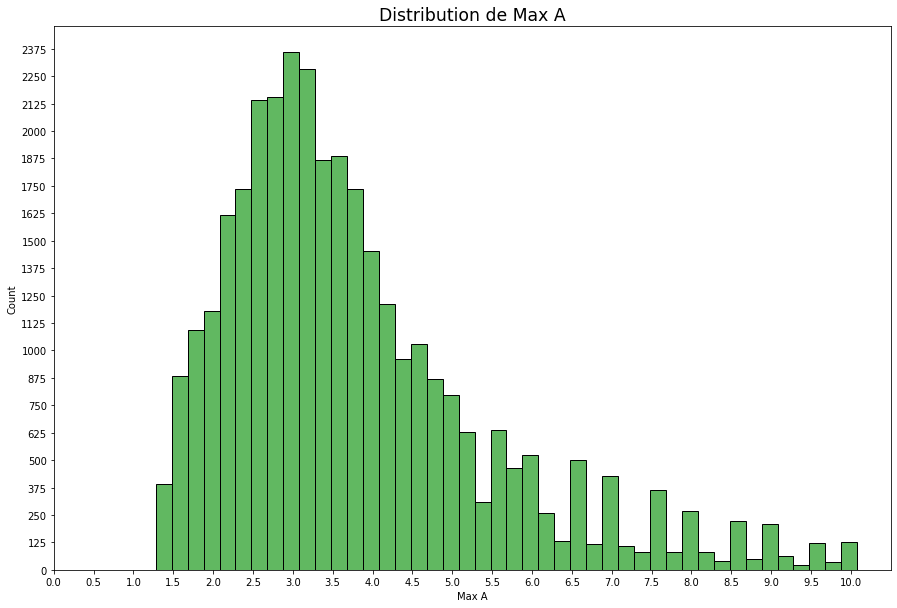

In [ ]:
plt.figure(figsize = (15 , 10))
plt.title("Distribution de Max H" , fontsize = "xx-large")
plt.xlim(0 , 10.5)
plt.xticks(np.arange(0 , 10.5 , 0.5))
plt.yticks(np.arange(0 , 4251 , 250))
sns.histplot(data = df_ml , x = "Max H" , color = "#1f77b4" , binwidth = 0.2)
plt.figure(figsize = (15 , 10))
plt.title("Distribution de Max D" , fontsize = "xx-large")
plt.xlim(0 , 10.5)
plt.xticks(np.arange(0 , 10.5 , 0.5))
plt.yticks(np.arange(0 , 9501 , 500))
sns.histplot(data = df_ml , x = "Max D" , color = "#ff7f0e" , binwidth = 0.2)
plt.figure(figsize = (15 , 10))
plt.title("Distribution de Max A" , fontsize = "xx-large")
plt.xlim(0 , 10.5)
plt.xticks(np.arange(0 , 10.5 , 0.5))
plt.yticks(np.arange(0 , 2376 , 125))
sns.histplot(data = df_ml , x = "Max A" , color = "#2ca02c" , binwidth = 0.2);

Notre jeu de données contient désormais toutes les données que nous souhaitions conserver pour le Machine Learning.

Nous allons faire un peu de datavisualisation avant de l'utiliser afin de mieux le comprendre.

Regardons tout d'abord comment se répartissent nos matchs en terme de championnats et de saisons.

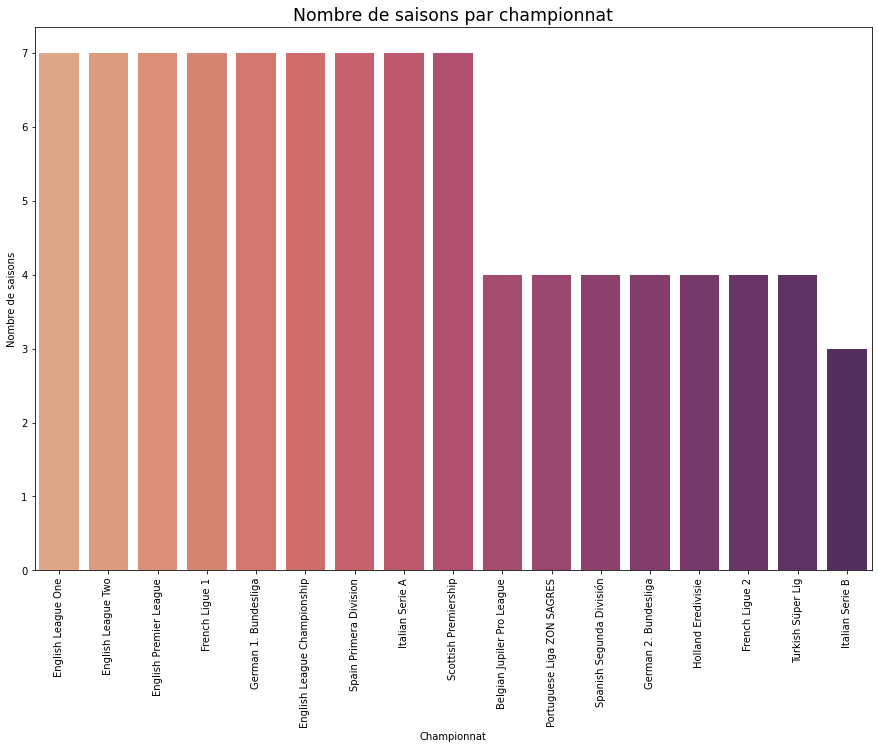

In [ ]:
plt.figure(figsize = (15 , 10))
sns.barplot(x = df_ml.groupby("Division")["Season"].unique().apply(lambda x : len(x)).index , y = df_ml.groupby("Division")["Season"].unique().apply(lambda x : len(x)) , order = df_ml.groupby("Division")["Season"].unique().apply(lambda x : len(x)).sort_values(ascending = False).index , palette = "flare")
plt.xticks(rotation = 90)
plt.xlabel("Championnat")
plt.ylabel("Nombre de saisons")
plt.title("Nombre de saisons par championnat" , fontsize = "xx-large");

Nous avons récupéré des matchs de 17 championnats pour les 7 saisons de 2014-2015 à 2020-2021. Cependant, nous n'avons pas systématiquement toutes les saisons pour tous les championnats puisque l'utilisation de ces matchs était conditionné à la disponibilité des données adéquates dans les différents jeux vidéo FIFA. Le graphe ci-dessus nous montre le nombre de saisons que nous pouvons exploiter par championnat.

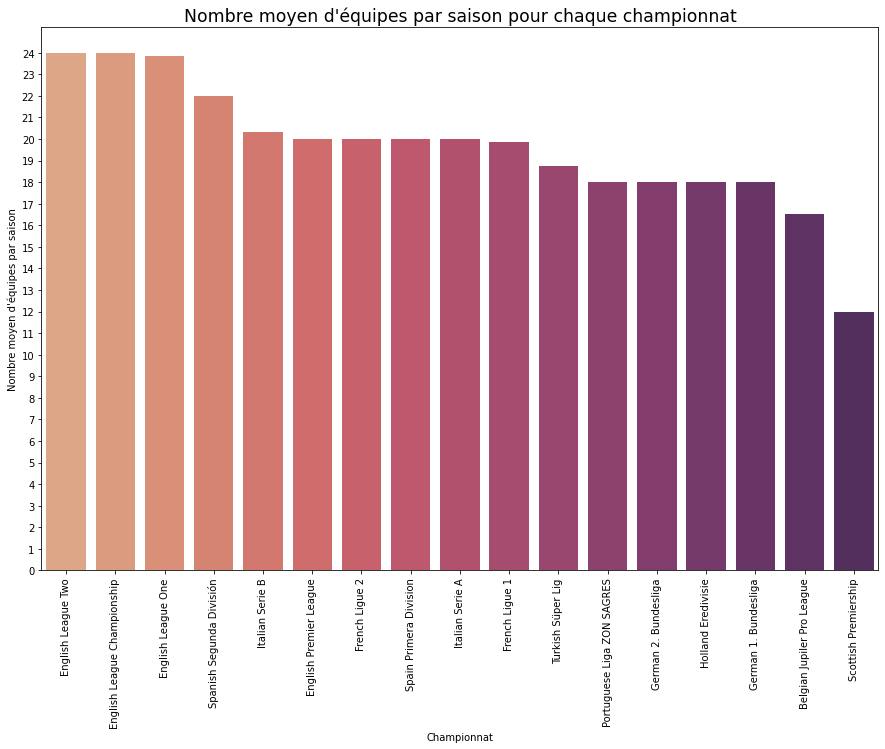

In [ ]:
plt.figure(figsize = (15 , 10))
sns.barplot(x = df_ml.groupby(["Division" , "Season"])["Home team"].unique().apply(lambda x : len(x)).groupby("Division").agg(np.mean).index , y = df_ml.groupby(["Division" , "Season"])["Home team"].unique().apply(lambda x : len(x)).groupby("Division").agg(np.mean) , order = df_ml.groupby(["Division" , "Season"])["Home team"].unique().apply(lambda x : len(x)).groupby("Division").agg(np.mean).sort_values(ascending = False).index , palette = "flare")
plt.xticks(rotation = 90)
plt.xlabel("Championnat")
plt.ylabel("Nombre moyen d'équipes par saison")
plt.yticks(np.arange(0 , 25 , 1))
plt.title("Nombre moyen d'équipes par saison pour chaque championnat" , fontsize = "xx-large");

Chaque championnat ne possède pas le même nombre d'équipes, c'est ce que représente le graphe ci-dessus.

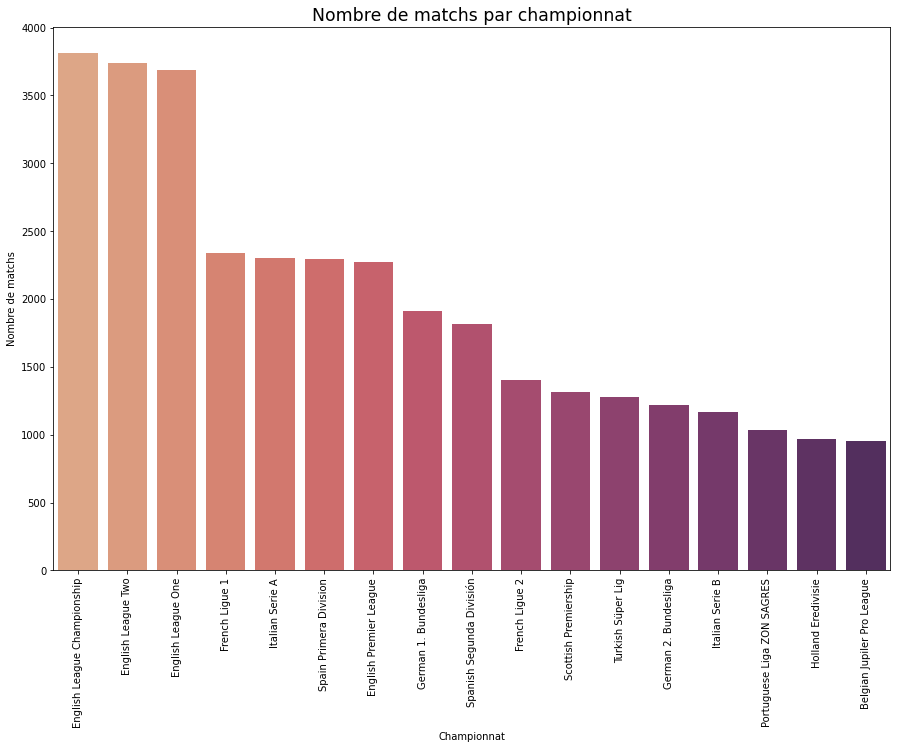

In [ ]:
plt.figure(figsize = (15 , 10))
sns.countplot(data = df_ml , x = "Division" , order = df_ml["Division"].value_counts().sort_values(ascending = False).index , palette = "flare")
plt.xticks(rotation = 90)
plt.xlabel("Championnat")
plt.ylabel("Nombre de matchs")
plt.title("Nombre de matchs par championnat" , fontsize = "xx-large");

Il est logique de retrouver parmi les championnats comptant le plus de matchs ceux dont nous disposons du plus grand nombre de saisons et dont le nombre d'équipes est le plus élevé.

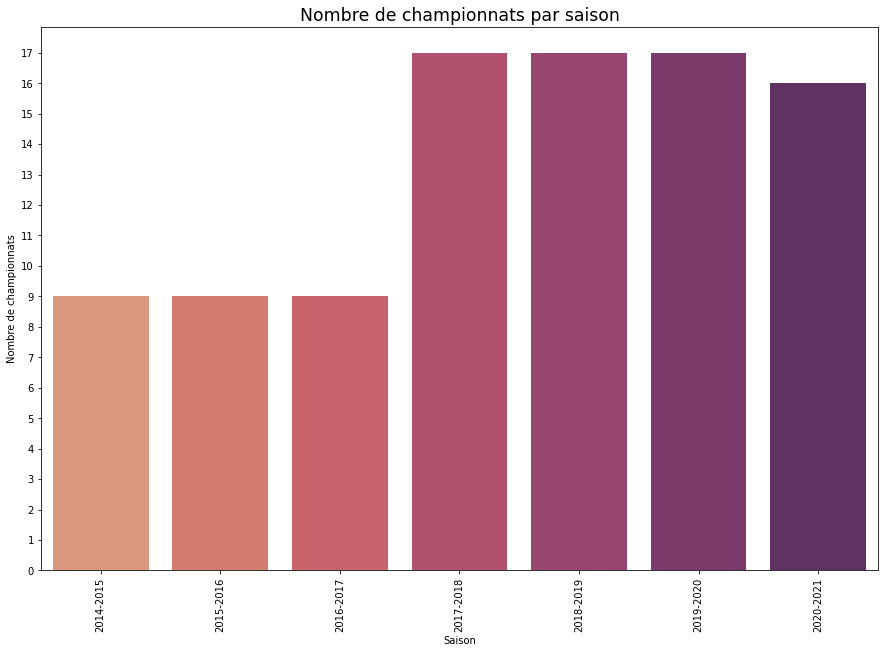

In [ ]:
plt.figure(figsize = (15 , 10))
sns.barplot(x = df_ml.groupby("Season")["Division"].unique().apply(lambda x : len(x)).index , y = df_ml.groupby("Season")["Division"].unique().apply(lambda x : len(x)) , order = df_ml.groupby("Season")["Division"].unique().apply(lambda x : len(x)).sort_index().index , palette = "flare")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0 , 18 , 1) , np.arange(0 , 18 , 1))
plt.xlabel("Saison")
plt.ylabel("Nombre de championnats")
plt.title("Nombre de championnats par saison" , fontsize = "xx-large");

Les 3 premières saisons comportent nettement moins de championnats que les suivantes, ce qui est principalement dû à la disponibilité des statistiques des matchs de certains championnat ainsi qu'à l'amélioration des jeux vidéo FIFA avec les années qui ont intégré de plus en plus de nouvelles équipes.

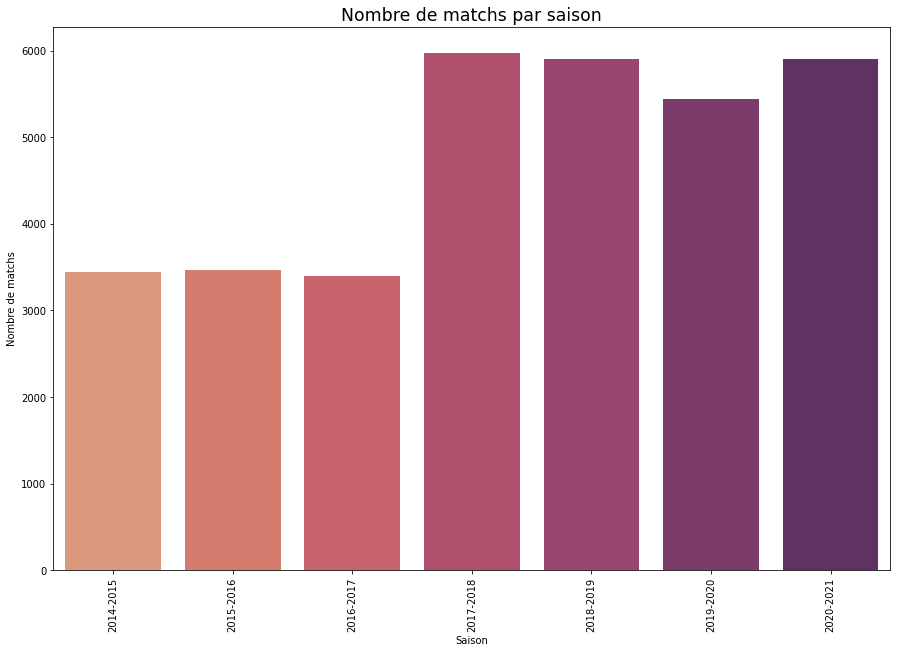

In [ ]:
plt.figure(figsize = (15 , 10))
sns.countplot(data = df_ml , x = "Season" , order = df_ml["Season"].value_counts().sort_index().index , palette = "flare")
plt.xticks(rotation = 90)
plt.xlabel("Saison")
plt.ylabel("Nombre de matchs")
plt.title("Nombre de matchs par saison" , fontsize = "xx-large");

La conséquence de ce qui a été dit ci-dessus est donc un nombre de matchs réduit pour les 3 premières saisons. Malgré un nombre de championnats maximal pour la saison 2019-2020, cette saison compte moins de matchs que les autres saisons équivalentes (2017-2018, 2018-2019 ou 2020-2021), ceci étant dû au fait que plusieurs championnats ne sont pas allés à leur terme à cause du contexte COVID.

Regardons désormais notre variable cible **FTR**.

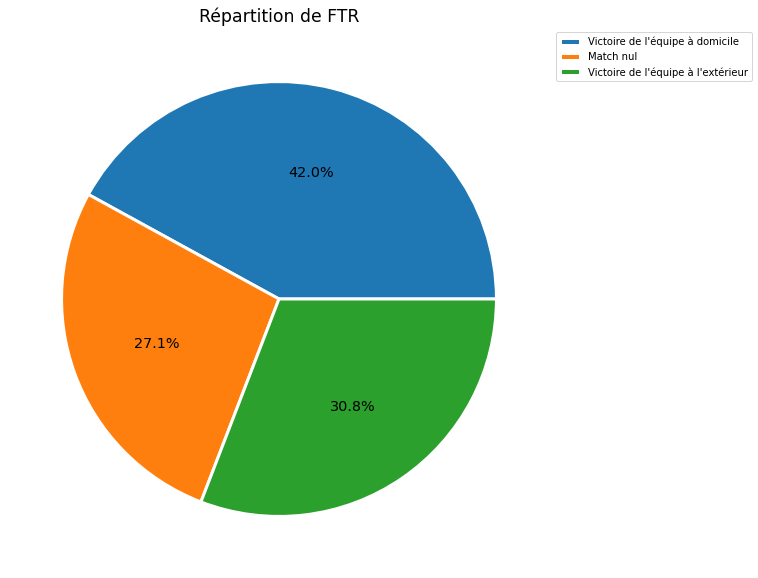

In [ ]:
plt.figure(figsize = (15 , 10))
plt.pie(df_ml["FTR"].value_counts()[["H" , "D" , "A"]], autopct= '%.1f%%' , wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'} , textprops={'size': 'x-large'})
plt.legend(labels = ["Victoire de l'équipe à domicile" , "Match nul" , "Victoire de l'équipe à l'extérieur"] , bbox_to_anchor = (1 , 1))
plt.title("Répartition de FTR" , fontsize = "xx-large");

On remarque que la répartition de **FTR** n'est pas équitable, il y a un nombre significativement plus élevé de victoires de l'équipe à domicile. Ce n'est pas surprenant puisqu'on connait dans le sport l'avantage de jouer à domicile, que ce soit par l'apport des supporters, l'habitude du terrain ou encore le trajet que doit faire l'équipe adverse et qui génère de la fatigue.

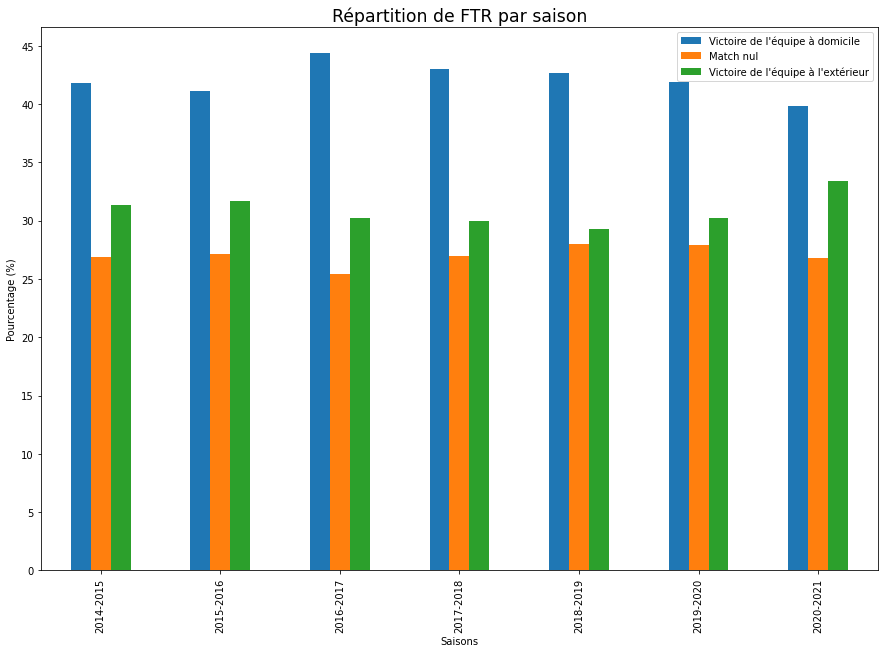

In [ ]:
fig , ax = plt.subplots(figsize = (15,10))
df_ml.groupby("Season")["FTR"].value_counts(normalize = True).apply(lambda x : round(x , 3)*100).unstack()[["H" , "D" , "A"]].plot(kind = "bar" , ax = ax)
ax.set_title("Répartition de FTR par saison" , fontsize = "xx-large")
ax.set_xlabel("Saisons")
ax.set_ylabel("Pourcentage (%)")
ax.set_yticks(np.arange(0 , 46 , 5))
plt.legend(labels = ["Victoire de l'équipe à domicile" , "Match nul" , "Victoire de l'équipe à l'extérieur"]);

Si l'on regarde la répartition de **FTR** par saison, on observe globalement toujours la même tendance avec une proportion significativement plus élevée de victoires de l'équipe à domicile.

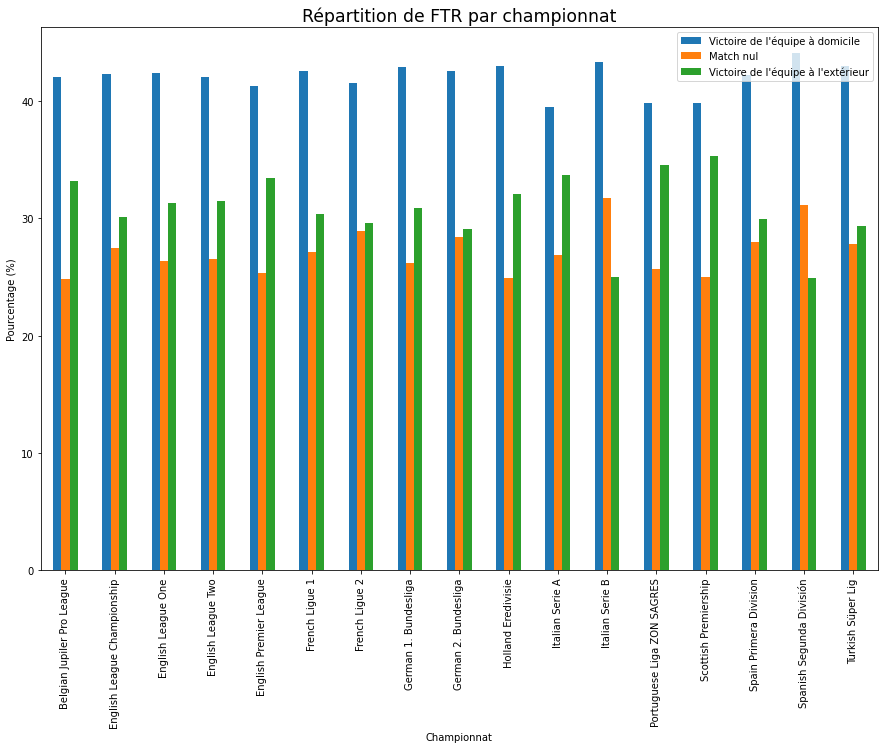

In [ ]:
fig , ax = plt.subplots(figsize = (15,10))
df_ml.groupby("Division")["FTR"].value_counts(normalize = True).apply(lambda x : round(x , 3)*100).unstack()[["H" , "D" , "A"]].plot(kind = "bar" , ax = ax)
ax.set_title("Répartition de FTR par championnat" , fontsize = "xx-large")
ax.set_xlabel("Championnat")
ax.set_ylabel("Pourcentage (%)")
plt.legend(labels = ["Victoire de l'équipe à domicile" , "Match nul" , "Victoire de l'équipe à l'extérieur"]);

Il en est de même pour la répartition de **FTR** par championnat avec toujours une plus importante proportion de victoires de l'équipe à domicile. Nous observons cependant parfois que la proportion de match nul dépasse la proportion de victoire de l'équipe à l'extérieur.  

Regardons désormais l'influence de nos variables explicatives sur notre variable cible **FTR** notamment les variables **Cote** et **Overall**.

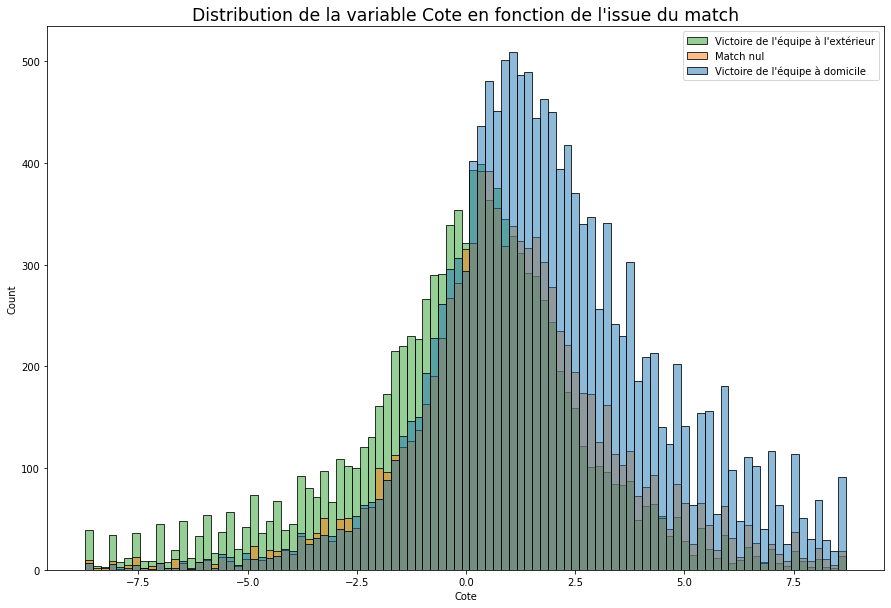

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(data = df_ml , x = "Cote" , hue = "FTR" , hue_order = ["H" , "D" , "A"])
plt.legend(["Victoire de l'équipe à l'extérieur" , "Match nul" , "Victoire de l'équipe à domicile"])
plt.title("Distribution de la variable Cote en fonction de l'issue du match" , fontsize = "xx-large");

Pour les valeurs de **Cote** positives (les bookmakers estiment que l'équipe à domicile est favorite), nous observons une plus importante proportion de bleu (victoire de l'équipe à domicile), de même que pour les valeurs de **Cote** négatives (les bookmakers estiment que l'équipe à l'extérieur est favorite), nous observons une plus importante proportion de vert (victoire de l'équipe à l'extérieur). Ceci est conforme à ce que nous attendions. Au milieu, les matchs nuls sont plutôt confondus avec le reste, ce qui montre qu'ils seront probablement difficiles à prédire.

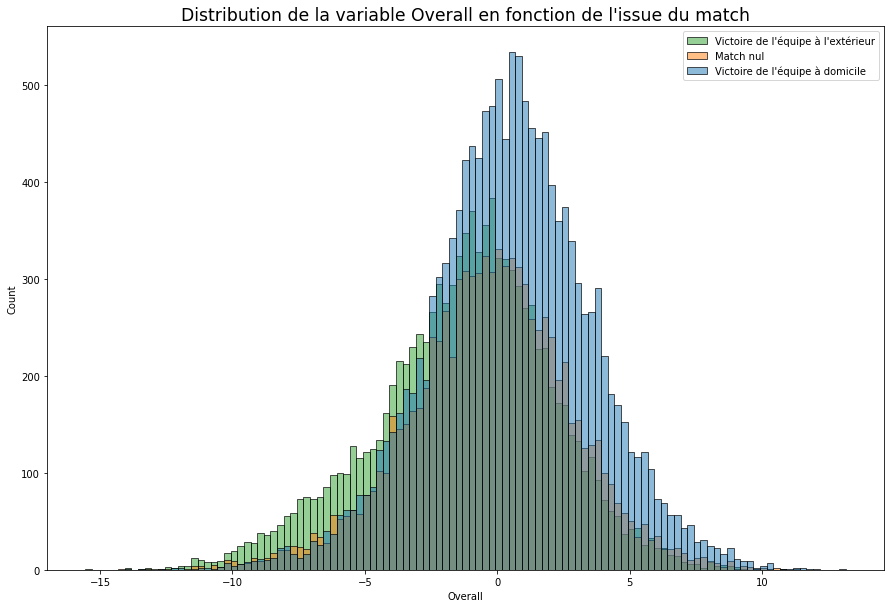

In [ ]:
plt.figure(figsize = (15 , 10))
sns.histplot(data = df_ml , x = "Overall" , hue = "FTR" , hue_order = ["H" , "D" , "A"])
plt.legend(["Victoire de l'équipe à l'extérieur" , "Match nul" , "Victoire de l'équipe à domicile"])
plt.title("Distribution de la variable Overall en fonction de l'issue du match" , fontsize = "xx-large");

Nous observons sensiblement la même chose avec la variable **Overall**, ce qui est encore fois assez logique puisque une valeur d'**Overall** positive signifie que l'équipe à domicile est plus forte (respectivement une valeur d'**Overall** négative signifie que l'équipe à l'extérieur est plus forte). Cependant, contrairement à la variable **Cote**, la frontière se fait ici pour une valeur négative d'**Overall**, ce qui montre l'avantage de jouer à domicile même si l'équipe à domicile est moins forte.

Nous n'allons pas regarder en détail toutes les variables explicatives, mais voici un descriptif de leurs distributions.

In [ ]:
df_ml.loc[: , "Full time goals scored (1 game)" : ].describe()

,Full time goals scored (1 game),Full time goals conceded (1 game),Shots (1 game),Shots on target (1 game),Full time goals scored (home or away) (1 game),Full time goals conceded (home or away) (1 game),Shots (home or away) (1 game),Shots on target (home or away) (1 game),Full time goals scored (3 games),Full time goals conceded (3 games),Shots (3 games),Shots on target (3 games),Full time goals scored (home or away) (3 games),Full time goals conceded (home or away) (3 games),Shots (home or away) (3 games),Shots on target (home or away) (3 games),Full time goals scored (5 games),Full time goals conceded (5 games),Shots (5 games),Shots on target (5 games),Full time goals scored (home or away) (5 games),Full time goals conceded (home or away) (5 games),Shots (home or away) (5 games),Shots on target (home or away) (5 games),Full time goals scored (home or away) (20 games),Full time goals conceded (home or away) (20 games),Shots (home or away) (20 games),Shots on target (home or away) (20 games),Full time goals scored (40 games),Full time goals conceded (40 games),Shots (40 games),Shots on target (40 games),Points (1 game),Points (3 games),Points (5 games),Points (40 games),Points (home or away) (1 game),Points (home or away) (3 games),Points (home or away) (5 games),Points (home or away) (20 games),Cote,Age,Overall,Potential,Value (€),Pace,Shooting,Passing,Dribbling,Defending,Physic
count,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,3.352400e+04,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000,33524.000000
mean,-0.225928,0.215875,-1.515750,-0.574573,0.229179,-0.246808,1.847095,0.632025,-0.092928,0.082279,-0.574131,-0.232112,0.225346,-0.244889,1.854975,0.631702,-0.072785,0.059171,-0.421462,-0.175141,0.222851,-0.243087,1.854475,0.629919,0.215601,-0.238464,1.827789,0.609250,-0.056784,0.041421,-0.301845,-0.133716,-0.310524,-0.120088,-0.090560,-0.064939,0.335193,0.328934,0.324718,0.314494,1.079232,0.009517,-0.279934,-0.280854,-4.719243e+05,-0.210512,-0.266982,-0.295261,-0.280919,-0.215326,-0.133602
std,1.615843,1.655508,6.402103,3.232827,1.585159,1.629164,6.209231,3.143813,0.994783,1.000834,4.120983,2.033341,1.010044,1.020641,4.191401,2.054587,0.833313,0.823915,3.542250,1.722037,0.870940,0.875906,3.719026,1.793918,0.754397,0.753485,3.334858,1.580220,0.632509,0.610250,2.866813,1.354500,1.790137,1.102881,0.924048,0.699764,1.769496,1.129055,0.975006,0.843360,2.689180,1.662581,3.264694,3.365451,4.506079e+06,3.814913,4.098957,4.014865,3.745267,3.991078,3.313670
min,-9.000000,-12.000000,-34.000000,-16.000000,-11.000000,-9.000000,-33.000000,-18.000000,-7.000000,-5.333333,-23.000000,-12.000000,-5.500000,-7.000000,-23.000000,-15.000000,-7.000000,-5.000000,-23.000000,-12.000000,-5.500000,-7.000000,-23.000000,-15.000000,-5.500000,-7.000000,-23.000000,-15.000000,-7.000000,-5.000000,-23.000000,-12.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-8.720000,-8.478261,-15.565217,-14.545455,-3.486674e+07,-15.571429,-18.500000,-17.021429,-16.213158,-19.285714,-14.000000
25%,-1.000000,-1.000000,-6.000000,-3.000000,-1.000000,-1.000000,-2.000000,-1.000000,-0.666667,-0.666667,-3.000000,-1.666667,-0.333333,-1.000000,-0.666667,-0.666667,-0.600000,-0.400000,-2.600000,-1.200000,-0.200000,-0.800000,-0.200000,-0.400000,-0.166667,-0.666667,0.000000,-0.214286,-0.385944,-0.300000,-1.883492,-0.866667,-2.000000,-1.000000,-0.600000,-0.456558,0.000000,-0.333333,-0.200000,-0.111111,-0.350000,-1.08695

La dernière étape consiste à supprimer les variables descriptives **Division**, **Date**, **Home team** et **Away team**. La variable **Season** est aussi une variable descriptive, cependant nous en avons besoin pour séparer notre jeu de données en un jeu de données d'entrainement et un jeu de données de test.

*   Suppression des colonnes **Division**, **Date**, **Home team** et **Away team**.
*   Réorganisation des colonnes.

In [ ]:
df_ml = df_ml.drop(columns = ["Division" , "Date" , "Home team" , "Away team"])
df_ml = df_ml.loc[: , "Full time goals scored (1 game)" : ].join(df_ml.loc[: , "Season" : "Max A"])

*   Réinitialisation de l'index

In [ ]:
df_ml = df_ml.reset_index(drop = True)

*   Visualisation du DataFrame **df_ml**.

In [ ]:
df_ml.tail()

,Full time goals scored (1 game),Full time goals conceded (1 game),Shots (1 game),Shots on target (1 game),Full time goals scored (home or away) (1 game),Full time goals conceded (home or away) (1 game),Shots (home or away) (1 game),Shots on target (home or away) (1 game),Full time goals scored (3 games),Full time goals conceded (3 games),Shots (3 games),Shots on target (3 games),Full time goals scored (home or away) (3 games),Full time goals conceded (home or away) (3 games),Shots (home or away) (3 games),Shots on target (home or away) (3 games),Full time goals scored (5 games),Full time goals conceded (5 games),Shots (5 games),Shots on target (5 games),Full time goals scored (home or away) (5 games),Full time goals conceded (home or away) (5 games),Shots (home or away) (5 games),Shots on target (home or away) (5 games),Full time goals scored (home or away) (20 games),Full time goals conceded (home or away) (20 games),Shots (home or away) (20 games),Shots on target (home or away) (20 games),Full time goals scored (40 games),Full time goals conceded (40 games),Shots (40 games),Shots on target (40 games),Points (1 game),Points (3 games),Points (5 games),Points (40 games),Points (home or away) (1 game),Points (home or away) (3 games),Points (home or away) (5 games),Points (home or away) (20 games),Cote,Age,Overall,Potential,Value (€),Pace,Shooting,Passing,Dribbling,Defending,Physic,Season,FTR,Max H,Max D,Max A
33519,0.0,-1.0,4.0,1.0,0.0,-2.0,-1.0,1.0,0.000000,-1.333333,-5.333333,-0.666667,0.000000,-0.666667,2.000000,0.000000,0.2,-0.2,-1.6,0.0,0.0,-0.2,3.0,-0.2,0.15,-0.45,2.20,0.20,0.025,-0.125,0.775,0.300,0.0,0.000000,0.0,0.300,0.0,0.000000,0.0,0.45,1.61,-1.086957,2.000000,3.260870,4.702174e+05,1.095238,1.000000,2.238095,3.666667,3.761905,0.333333,2020-2021,H,2.20,3.22,3.81
33520,-1.0,1.0,3.0,0.0,0.0,-2.0,2.0,-1.0,0.000000,-0.333333,4.000000,0.666667,0.000000,-1.333333,2.333333,0.000000,0.0,0.0,3.8,0.6,-0.4,-1.0,-0.4,0.0,0.05,-0.55,1.00,0.55,0.025,-0.175,2.025,0.700,-2.0,-0.333333,-0.2,0.250,1.0,1.333333,0.4,0.45,-2.94,-4.695652,-1.043478,2.869565,2.228261e+05,2.285714,-4.095238,-0.380952,0.857143,0.000000,-1.238095,2020-2021,A,4.75,3.80,1.81
33521,-2.0,1.0,-2.0,1.0,0.0,4.0,3.0,-2.0,-0.666667,1.666667,1.666667,0.666667,0.333333,1.000000,2.000000,-0.666667,-1.0,1.2,1.4,-1.0,0.4,0.6,-0.6,-1.4,0.30,0.40,0.15,0.25,-0.250,0.525,-1.225,-0.375,-3.0,-2.000000,-2.0,-0.625,-3.0,-0.333333,0.0,-0.15,-3.94,-1.521739,-4.826087,-2.956522,-2.088043e+06,-2.714286,-5.857143,-2.380952,-3.619048,1.523810,-5.380952,2020-2021,D,5.63,3.74,1.69
33522,-2.0,-1.0,-4.0,1.0,-1.0,-3.0,1.0,-2.0,-1.333333,-1.333333,-4.666667,-1.333333,-0.666667,-1.000000,-2.333333,-2.666667,-1.2,-1.2,-3.4,-1.8,-1.0,-0.6,-1.8,-2.0,-0.15,-0.60,0.45,0.05,-0.525,-0.350,-1.625,-0.800,-2.0,0.000000,0.0,-0.125,3.0,0.666667,0.0,0.40,2.13,1.260870,-1.043478,-2.000000,-9.150000e+05,-1.666667,3.142857,0.904762,-0.904762,-2.619048,3.190476,2020-2021,A,1.97,3.68,4.10
33523,0.0,-1.0,1.0,-3.0,3.0,0.0,0.0,0.0,1.000000,-0.333333,2.000000,0.000000,2.000000,0.000000,1.666667,1.666667,0.4,-0.2,4.6,1.0,1.4,-1.2,2.6,2.0,0.70,-0.90,2.55,0.55,0.350,-0.300,3.100,0.775,0.0,0.666667,0.4,0.500,2.0,1.333333,1.4,1.25,4.17,-0.841897,3.104743,3.454545,1.063162e+06,5.188095,3.178571,1.647619,0.914286,1.900000,1.738095,2020-2021,A,1.58,4.38,5.75


*   Taille du DataFrame **df_ml**.

In [ ]:
df_ml.shape

(33524, 56)

Visualisation des infos du DataFrame **df_ml**.

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33524 entries, 0 to 33523
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Full time goals scored (1 game)                     33524 non-null  float64
 1   Full time goals conceded (1 game)                   33524 non-null  float64
 2   Shots (1 game)                                      33524 non-null  float64
 3   Shots on target (1 game)                            33524 non-null  float64
 4   Full time goals scored (home or away) (1 game)      33524 non-null  float64
 5   Full time goals conceded (home or away) (1 game)    33524 non-null  float64
 6   Shots (home or away) (1 game)                       33524 non-null  float64
 7   Shots on target (home or away) (1 game)             33524 non-null  float64
 8   Full time goals scored (3 games)                    33524 non-null  float64


*   Export CSV du DataFrame **df_ml** pour le Machine Learning.

In [ ]:
df_ml.to_csv("drive/MyDrive/Formations/DataScientest/Projet/Projet paris sportifs/Données d'entrée/Jeu de données pour Machine Learning.csv")